<a href="https://colab.research.google.com/github/jimkarag02/Projects/blob/main/AI_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Lab Project
### Group 5


*   Mert Kaan Denizciler
*   Giosuè Castellano
*   Matteo Lauriola
*   Dimitris Karagatslis
*   Andrea Zoccante
*   Daniele Pecci







_______________________________________

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction

The major advances in the fields of AI and genomics complement each other to let us advance the field of medicine at an ever increasing pace. In this study, we apply machine learning and AI methods to gene expression data generated by cancer cells. The overall aim of this analysis is to better understand how these cells change their behavior under the influence of their microenvironment. Specifically, we will build a model to predict whether a cancer is under hypoxia or normoxia. This model will use gene expression data in the form of single cell  RNA sequencing.





## Materials and Methods

Materials:

The data was obtained from 4 experiments where cancer cell lines were studied. The two cancer cell lines, MCF7 and HCC1806, were each studied by two different sequencing technologies: SMART-seq and Drop-seq

Methods:




*   Exploratory Data Analysis
  *   Visualization
  *   Finding Outliers
  *   Filtering
*   Unsupervised Learning
  *   Dimensionality Reduction and Cluster
      *   PCA and Isomap
      *   K-Means




*   Supervised Learning
  *   SVM binary
  *   Decision Tree
  *   Random Forest
  *   Perceptron
  *   Logistic regression
  *   Voting Hard
  *   Ensamble









## Python Libraries

In [ ]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns   #visualisation
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import kurtosis, skew
import math
%matplotlib inline     
sns.set(color_codes=True)
#[....] for you to add

________________________

## Exploratory Data Analysis

In this section, we will:

*   Describe the structure and content of each data file 
*   Explore the data and visualize it
*   Clean the data by dealing with missing values and outliers





We start by looking at the structure and content of each data file.

There are four experiments in total.

*   There are filtered and normalized data files, for each of the four experiments
*   There are unfiltered data files and metadata files only for the two SmartSeq experiments


We start with the metadata files. We load in the 2 metadata files and check their dimensions.

In [ ]:
df_meta_M_SmartS = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df_meta_H_SmartS = pd.read_csv("drive/MyDrive/Lab/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("MCF7 metadata dataframe dimensions:", np.shape(df_meta_M_SmartS))
print("HCC1806 metadata dataframe dimensions:", np.shape(df_meta_H_SmartS))

MCF7 metadata dataframe dimensions: (383, 8)
HCC1806 metadata dataframe dimensions: (243, 8)


In each data matrix; the rows contain the samples, and the columns contain the conditions under which the sampling was done. The conditions include wheter the cell was under hypoxia or normoxia, so we will use this file to get the labels we need for the supervised learning part.

Now we move onto the unfiltered sequencing data.

In [ ]:
df_unf_M = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Unfiltered_Data.txt",delimiter=" ", engine='python', index_col=0)
df_unf_H = pd.read_csv("drive/MyDrive/Lab/HCC1806_SmartS_Unfiltered_Data.txt",delimiter=" ", engine='python', index_col=0)
print("MCF7 dataframe dimensions:", np.shape(df_unf_M))
print("HCC1806 dataframe dimensions:", np.shape(df_unf_H))


MCF7 dataframe dimensions: (22934, 383)
HCC1806 dataframe dimensions: (23396, 243)


Here, the columns contain the samples and the rows contain the genes. Genes are represented by their identifiers. Now we chech whether all the entries in the matrix are numeric or not.

In [ ]:
print("MCF7 all entries numeric:",df_unf_M.shape[1] == df_unf_M.select_dtypes(include=np.number).shape[1])
print("HCC1806 all entries numeric:",df_unf_H.shape[1] == df_unf_H.select_dtypes(include=np.number).shape[1])

MCF7 all entries numeric: True
HCC1806 all entries numeric: True


We see that all the entries in both MCF7 and HCC1806 are numeric.

Next, we look at some descriptive statistics both across the rows and the columns. From now on, we will use (M) to denote MCF7 and (H) to denote HCC1806.

In [ ]:
df_unf_M.describe()

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000          
mean                                           40.817651          
std                                           465.709940          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            17.000000          
max                                         46744.000000          

       output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000          
mean                                            0.012253          
std                                             0.207726          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                            14.000000          

       output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000          
mean                                           86.442400          
std                                          1036.572689          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             5.000000          
max                                         82047.000000          

       output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000        
mean                                            1.024636        
std                                             6.097362        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             0.000000        
max                                           289.000000        

       output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000        
mean                                           14.531351        
std                                           123.800530        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             7.000000        
max                                         10582.000000        

       output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000        
mean                                           56.213613        
std                                           503.599145        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                            23.000000        
max                                         46856.000000        

       output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam  \
count                                       22934.000000        
mean                                           75.397183        
std                                           430.471519        
min                                             0.000000        
25%                                             0.000000        
50%                                            

In [ ]:
df_unf_M.apply(pd.DataFrame.describe, axis=1)

count         mean          std  min    25%    50%     75%      max
WASH7P     383.0     0.133159     0.618664  0.0    0.0    0.0     0.0      9.0
MIR6859-1  383.0     0.026110     0.249286  0.0    0.0    0.0     0.0      4.0
WASH9P     383.0     1.344648     2.244543  0.0    0.0    0.0     2.0     20.0
OR4F29     383.0     0.054830     0.314770  0.0    0.0    0.0     0.0      3.0
MTND1P23   383.0     0.049608     0.229143  0.0    0.0    0.0     0.0      2.0
...          ...          ...          ...  ...    ...    ...     ...      ...
MT-TE      383.0     5.049608     6.644302  0.0    0.0    3.0     7.0     46.0
MT-CYB     383.0  2374.973890  2920.390000  0.0  216.5  785.0  4059.0  16026.0
MT-TT      383.0     2.083551     3.372714  0.0    0.0    0.0     3.0     22.0
MT-TP      383.0     5.626632     7.511180  0.0    0.0    3.0     8.0     56.0
MAFIP      383.0     1.749347     3.895204  0.0    0.0    0.0     2.0     32.0

[22934 rows x 8 columns]

[Text(0.5, 1.0, 'Gene Expression For a Cell (MCF7)')]

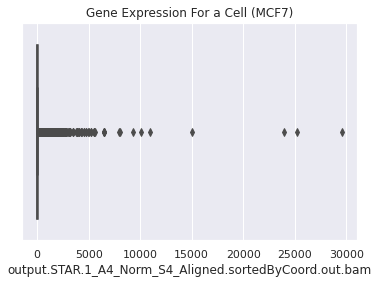

In [ ]:
cnames = list(df_unf_M.columns)
sns.boxplot(x=df_unf_M[cnames[6]]).set(title='Gene Expression For a Cell (MCF7)')


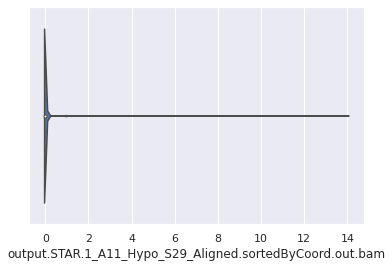

In [ ]:
sns.violinplot(x=df_unf_M[cnames[1]])

We made a box plot to visually inspect the distribution of gene expression. The box plot suggests that there are many outliers genes that have much higher expression than the rest.

Now we look at the percentage of zeros in dataframe. Then we plot the distribution of the percentage of zeros in the rows and columns (for both datasets).

(22934,)


count    22934.000000
mean         0.602153
std          0.355471
min          0.013055
25%          0.232376
50%          0.673629
75%          0.968668
max          0.994778
dtype: float64

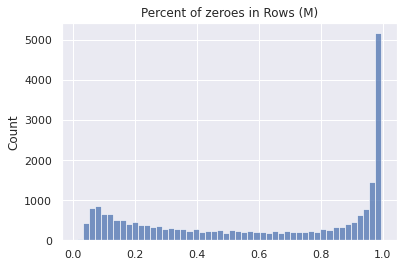

In [ ]:
percent_zeros_M_rows=(df_unf_M==0).sum(axis=1)/len(df_unf_M.columns)
sns.histplot(percent_zeros_M_rows,bins=50).set(title='Percent of zeroes in Rows (M)')
print(np.shape(percent_zeros_M_rows))
percent_zeros_M_rows.describe()

count    23396.000000
mean         0.558456
std          0.373002
min          0.012346
25%          0.152263
50%          0.617284
75%          0.950617
max          0.991770
dtype: float64

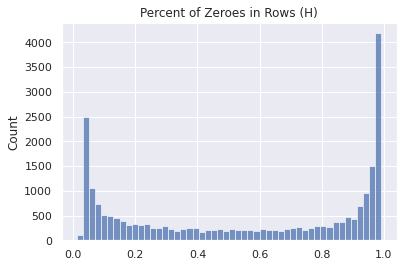

In [ ]:
percent_zeros_H_rows=(df_unf_H==0).sum(axis=1)/len(df_unf_H.columns)
sns.histplot(percent_zeros_H_rows,bins=50).set(title='Percent of Zeroes in Rows (H)')
percent_zeros_H_rows.describe()

(383,)


count    383.000000
mean       0.602153
std        0.117437
min        0.454129
25%        0.529563
50%        0.568021
75%        0.631268
max        0.999956
dtype: float64

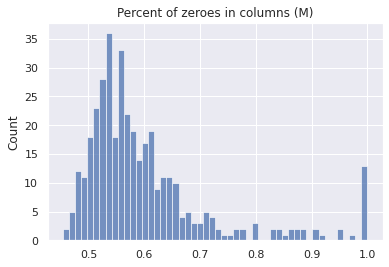

In [ ]:
percent_zeros_M_cols=(df_unf_M==0).sum(axis=0)/len(df_unf_M.index)
sns.histplot(percent_zeros_M_cols,bins=50).set(title='Percent of zeroes in columns (M)')
print(np.shape(percent_zeros_M_cols))
percent_zeros_M_cols.describe()

count    243.000000
mean       0.558456
std        0.096609
min        0.402206
25%        0.512353
50%        0.537058
75%        0.567576
max        0.998504
dtype: float64

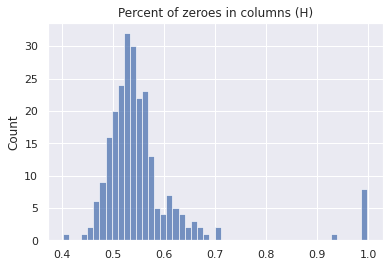

In [ ]:
percent_zeros_H_cols=(df_unf_H==0).sum(axis=0)/len(df_unf_H.index)
sns.histplot(percent_zeros_H_cols,bins=50).set(title='Percent of zeroes in columns (H)')
percent_zeros_H_cols.describe()

Our aim by producing these histograms was to filter out some rows or columns that had "too many" zeros. Looking at the first two histograms, it is not immediately clear where to draw the line of "too many" zeros. But, in the last two histograms that show the percentage of zeros in the columns, we can clearly see some outliers that have almost no gene expression. It is probably a good idea to remove these cells right now, because when we normalize the gene expression across cells, the noise in these outliers might be amplified.

By looking at the mean in the descriptive statistics, we see that 60% and 55% of the entries in the matrices are zeros. Together with the histograms for the percentage of zeros, this shows that the data is sparse. To adress this sparsity we will take a number of steps.

First, we can filter the dataset by removing all genes which have all values equal to 0, since we can consider them to be irrelevant.

In [ ]:
df_unf = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Unfiltered_Data.txt",delimiter=" ", engine='python', index_col=0)
print("Dataframe dimensions:", np.shape(df_unf_M))
df_filt= df_unf[~(df_unf == 0).all(axis=1)]
print("Dataframe dimensions:", np.shape(df_filt))


Dataframe dimensions: (22934, 383)
Dataframe dimensions: (22934, 383)


We can see that there are no genes with absolutely no presence and that's why the dimensions remain the same. This is not a surprise since we saw that the maximum percentages of zeros in the rows were 0.995 and 0.992 instead of 1.

So, we will try and filter the genes by the percentage of 0's they have in their rows. We can try 50% and 90%.

Dataframe dimensions: (5065, 383)


[Text(0.5, 1.0, 'At most 50% are Zeros in Rows')]

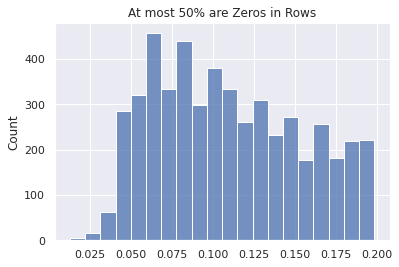

In [ ]:
df_filt1= df_unf_M[(df_unf_M==0).sum(axis=1)/len(df_unf_M.columns) <= 0.2]
print("Dataframe dimensions:", np.shape(df_filt1))
percent_zeros2 = (df_filt1==0).sum(axis=1)/len(df_filt1.columns)
sns.histplot(percent_zeros2,bins=20).set(title='At most 50% are Zeros in Rows')


Dataframe dimensions: (9522, 383)


[Text(0.5, 1.0, 'At most 90% are Zeros in Rows')]

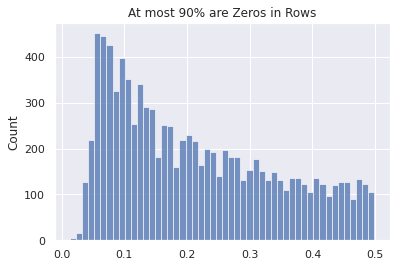

In [ ]:
df_filt2= df_unf_M[(df_unf_M==0).sum(axis=1)/len(df_unf_M.columns) <= 0.5]
print("Dataframe dimensions:", np.shape(df_filt2))
percent_zeros3 = (df_filt2==0).sum(axis=1)/len(df_filt2.columns)
sns.histplot(percent_zeros3,bins=50).set(title='At most 90% are Zeros in Rows')

(1, 383)
(332,)
Filtered dataframe dimensions: (22934, 332)


[Text(0.5, 1.0, 'At most 70% are Zeros in Columns')]

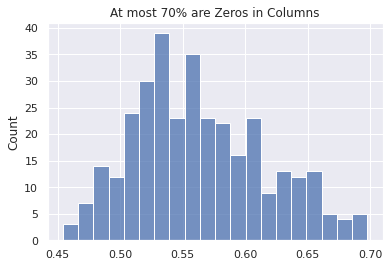

In [ ]:

filter_percentage=0.7

percent_zeros_M_cols=(df_unf_M==0).sum(axis=0)/len(df_unf_M.index)
print(np.shape([percent_zeros_M_cols <= filter_percentage]))
[percent_zeros_M_cols<= 0.9]
df_filt3= df_unf_M.loc[:,percent_zeros_M_cols<=filter_percentage]

percent_zeros4 = (df_filt3==0).sum(axis=0)/len(df_filt3.index)
print(np.shape(percent_zeros4))
print("Filtered dataframe dimensions:", np.shape(df_filt3))
sns.histplot(percent_zeros4,bins=20).set(title='At most 70% are Zeros in Columns')



Now lets see how the distribution of data looks, after we filtered the genes by some measure of sparsity.

[]

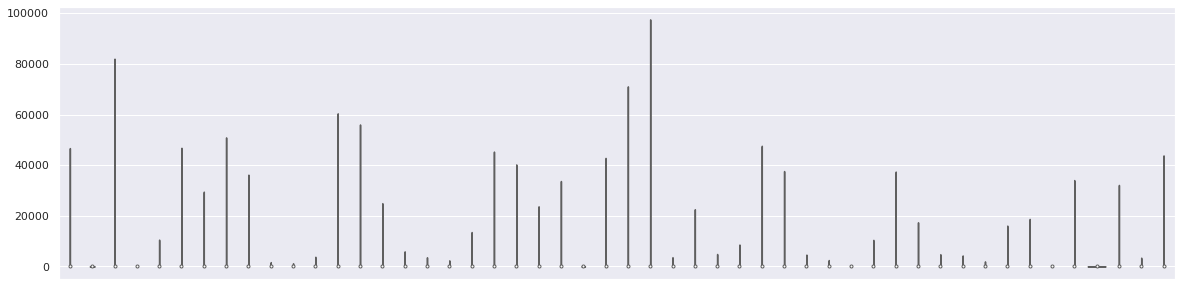

In [ ]:
df_unf_M_small=df_unf_M.iloc[:,:50]
plt.figure(figsize=(20,5))
plot=sns.violinplot(data=df_unf_M_small,palette="Set3",cut=0)
plot.set_xticklabels([])

[]

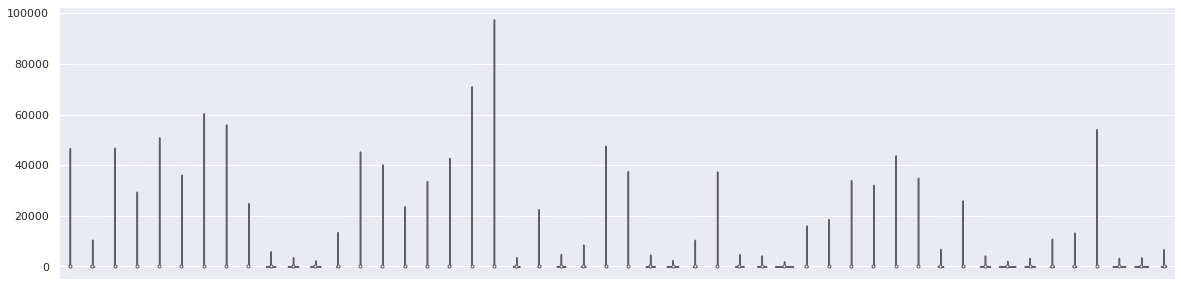

In [ ]:
df_filt3_small=df_filt3.iloc[:,:50]
plt.figure(figsize=(20,5))
plot=sns.violinplot(data=df_filt3_small,palette="Set3",cut=0)
plot.set_xticklabels([])

We can see that after removing some cells that have too little gene expression, the cells have more variablity on average. Therefore we can say that we removed the least informative ones.

Now we can inspect summary statistics of the distribution of our data using skewness and kurtosis, so that we can possibly transform the data later on if needed. For this part, we will use the filtered-normalized data so that we can better show our point. Now we will start the analysis on this part only on MCF7 and then apply our findings on HCC1806 as well.

In [ ]:
df_M_filt_norm = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0) 

In [ ]:
cnames = list(df_M_filt_norm.columns)

Text(0.5, 0, 'Skewness of single cells expression profiles - original df_M_filt_norm')

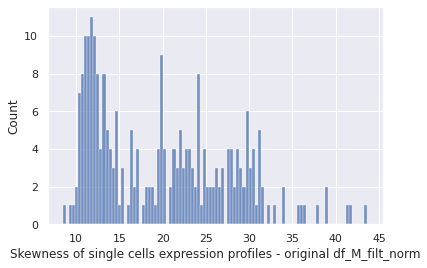

In [ ]:
colN = np.shape(df_M_filt_norm)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df_M = df_M_filt_norm[cnames[i]]
     df_skew_cells += [skew(v_df_M)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df_M_filt_norm')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df_M_filt_norm')

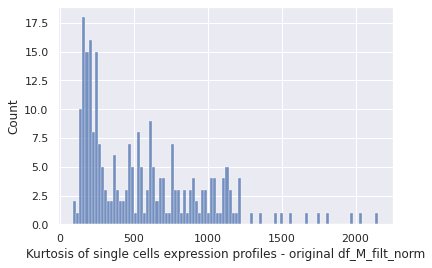

In [ ]:
df_kurt_cells = []
for i in range(colN) :     
     v_df = df_M_filt_norm[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df_M_filt_norm')

We observe that the distribution is highly non-normal, skewed, with heavy tails and since our data is normalized this is irregular and we need to transform our data.

We are gonna explore two kind of transformations that could possibly solve our problem, log 2 and the square root. Theoretically both should "drop the heavy tails" of our distribution and make it appear more like a normal one.

We begin with some random cell example for both transformations

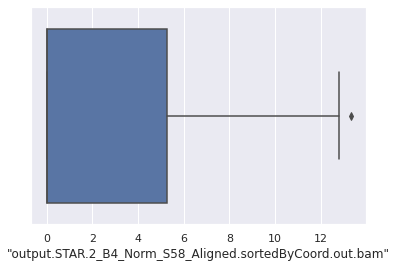

In [ ]:
df1M_log2 = np.log2(df_M_filt_norm[cnames[1]]+1)
sns.boxplot(x=df1M_log2)

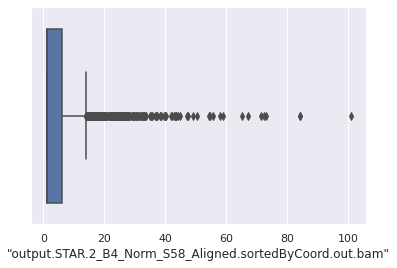

In [ ]:
df1M_sqr = np.sqrt(df_M_filt_norm[cnames[1]]+1)
sns.boxplot(x=df1M_sqr)

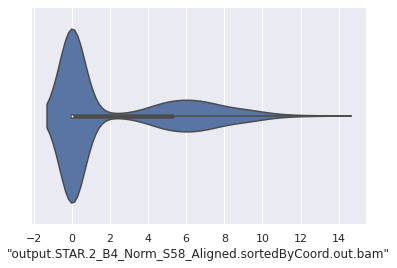

In [ ]:
sns.violinplot(x=df1M_log2)

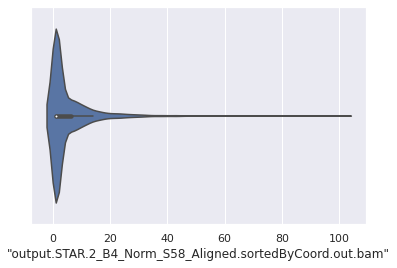

In [ ]:
sns.violinplot(x=df1M_sqr)

From the plots we observe that log2 seem to do a better job at "minimizing outliers"

Now we are gonna check the summary statistics again and compare them

In [ ]:
display(df1M_log2.describe().round(2))

count    3000.00
mean        2.30
std         3.30
min         0.00
25%         0.00
50%         0.00
75%         5.25
max        13.31
Name: "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam", dtype: float64

In [ ]:
display(df1M_sqr.describe().round(2))

count    3000.00
mean        4.94
std         8.22
min         1.00
25%         1.00
50%         1.00
75%         6.16
max       100.84
Name: "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam", dtype: float64

We move on by applying the transformations to all the data

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

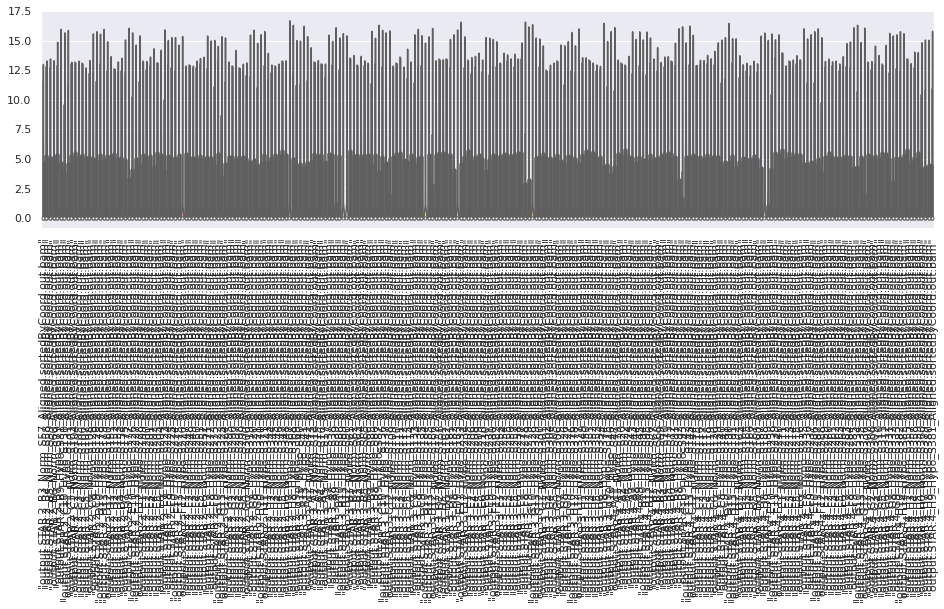

In [ ]:
df_M_filt_norm = df_M_filt_norm + 1
df_M_filt_norm_log2 = df_M_filt_norm.apply(np.log2)


np.shape(df_M_filt_norm_log2)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_M_filt_norm_log2,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

We see that the data is too much to be presented in one plot so we choose to select a "representative" part of it to prove our point

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

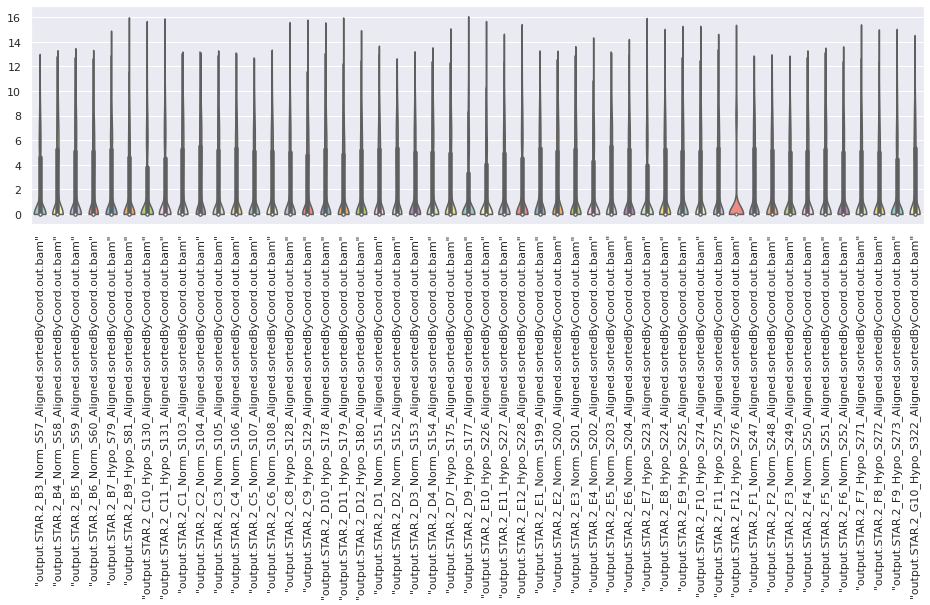

In [ ]:
df_M_filt_norm_log2_small = df_M_filt_norm_log2.iloc[:, :50]
np.shape(df_M_filt_norm_log2_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df__M_filt_norm_log2_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

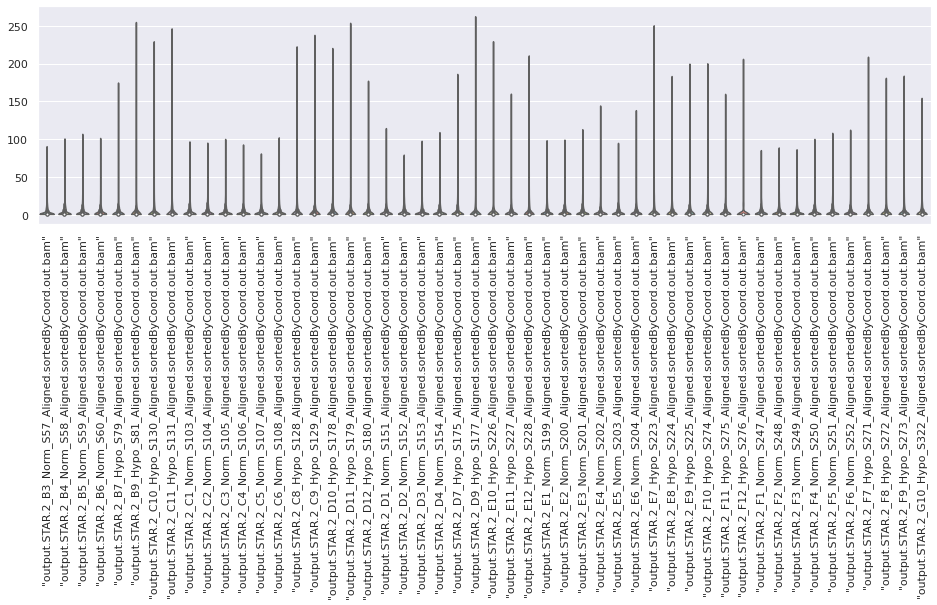

In [ ]:
df_M_filt_norm_sqrt = df_M_filt_norm.apply(np.sqrt)
df_M_filt_norm_sqrt_small = df_M_filt_norm_sqrt.iloc[:, :50]
np.shape(df_M_filt_norm_sqrt_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_M_filt_norm_sqrt_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)




And now we show skewness and kurtosis for both

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df_unf_M')

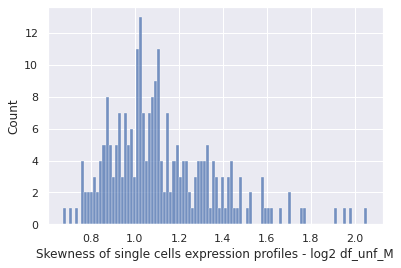

In [ ]:
dfM1_log2_skew_cells = []
for i in range(colN) :     
     v_df = df_M_filt_norm_log2[cnames[i]]
     dfM1_log2_skew_cells += [skew(v_df)]   
dfM1_log2_skew_cells
sns.histplot(dfM1_log2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df_M_filt_norm')

Text(0.5, 0, 'Skewness of single cells expression profiles - sqrt df_M_filt_norm')

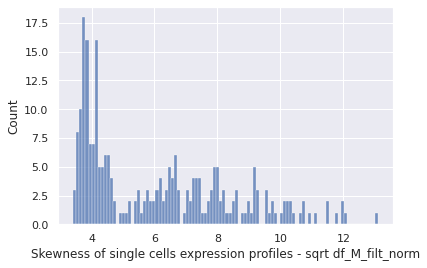

In [ ]:
dfM1_sqrt_skew_cells = []
for i in range(colN) :     
     v_df = df_M_filt_norm_sqrt[cnames[i]]
     dfM1_sqrt_skew_cells += [skew(v_df)]   
dfM1_sqrt_skew_cells
sns.histplot(dfM1_sqrt_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - sqrt df_M_filt_norm')

show kurtosis

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df_M_filt_norm')

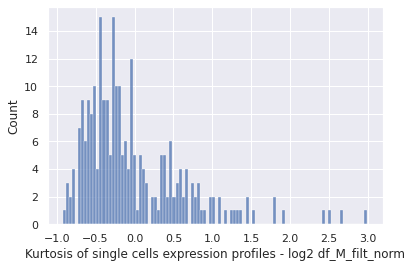

In [ ]:
dfM1_log2_kurt_cells = []
for i in range(colN) :     
     v_df = df_M_filt_norm_log2[cnames[i]]
     dfM1_log2_kurt_cells += [kurtosis(v_df)] 
dfM1_log2_kurt_cells
sns.histplot(dfM1_log2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df_M_filt_norm')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - sqrt df_M_filt_norm')

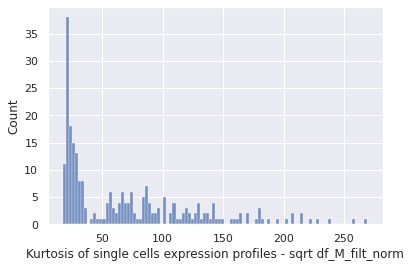

In [ ]:
dfM1_sqrt_kurt_cells = []
for i in range(colN) :     
     v_df = df_M_filt_norm_sqrt[cnames[i]]
     dfM1_sqrt_kurt_cells += [kurtosis(v_df)] 
dfM1_sqrt_kurt_cells
sns.histplot(dfM1_sqrt_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - sqrt df_M_filt_norm')

We see that in the end the square root is a weaker transformation than log2 and even though there is not a big difference when comparing them on a specific cell example, the effect on the overall dataset is important.

Now we are gonna move on by applying log2 on the HC1806 dataset and comparing the before and after skewness and kurtosis to make sure that it is a right choice for it as well.

In [ ]:
df_H_filt_norm = pd.read_csv("drive/MyDrive/Lab/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)

In [ ]:
cnames = list(df_H_filt_norm.columns)

Text(0.5, 0, 'Skewness of single cells expression profiles - original df_H_filt_norm')

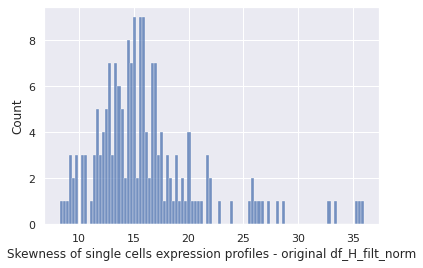

In [ ]:
colN = np.shape(df_H_filt_norm)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df_M = df_H_filt_norm[cnames[i]]
     df_skew_cells += [skew(v_df_M)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df_H_filt_norm')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df_H_filt_norm')

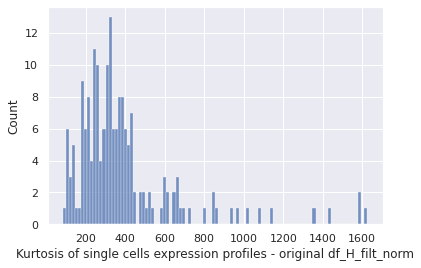

In [ ]:
df_kurt_cells = []
for i in range(colN) :     
     v_df = df_H_filt_norm[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df_H_filt_norm')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

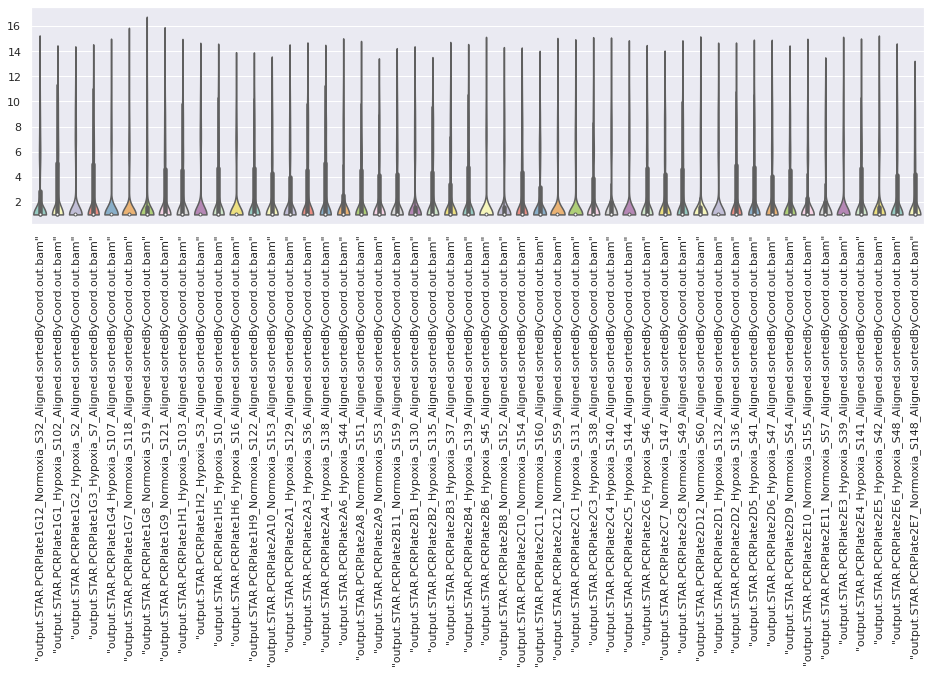

In [ ]:
df_H_filt_norm = df_H_filt_norm + 1
df_H_filt_norm_log2 = df_H_filt_norm.apply(np.log2)
df_H_filt_norm_log2_small = df_H_filt_norm_log2.iloc[:, :50]
np.shape(df_H_filt_norm_log2_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=df_H_filt_norm_log2_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df_H_filt_norm')

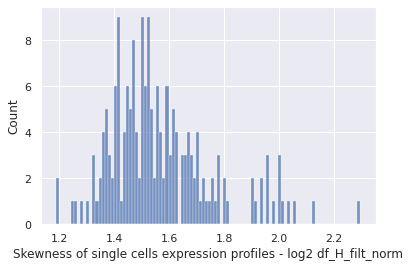

In [ ]:
dfH1_log2_skew_cells = []
for i in range(colN) :     
     v_df = df_H_filt_norm_log2[cnames[i]]
     dfH1_log2_skew_cells += [skew(v_df)]   
dfH1_log2_skew_cells
sns.histplot(dfH1_log2_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - log2 df_H_filt_norm')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df_H_filt_norm')

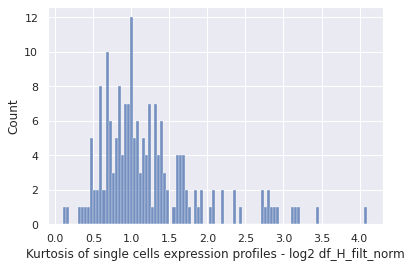

In [ ]:
dfH1_log2_kurt_cells = []
for i in range(colN) :     
     v_df = df_H_filt_norm_log2[cnames[i]]
     dfH1_log2_kurt_cells += [kurtosis(v_df)] 
dfH1_log2_kurt_cells
sns.histplot(dfH1_log2_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df_H_filt_norm')

We once again see that after the log2 transformation the tail has been dropped and the distribution seems more normal-like so we see that log2 works for HCC1806 as well

Now we are going to move on the analysis of the normalization of the data

In [ ]:
df_fil_norm_M = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_fil_M = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)
df_fil_norm_H = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
df_fil_H = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_Filtered_Data.txt",delimiter="\ ",engine='python',index_col=0)

We now plot the three data sets: (Unfiltered), (Filtered), (Filtered and Normalized)

By looking at the differences between these plots, we can say that that we need to normalize the "Unfiltered" and "Filtered" datasets.

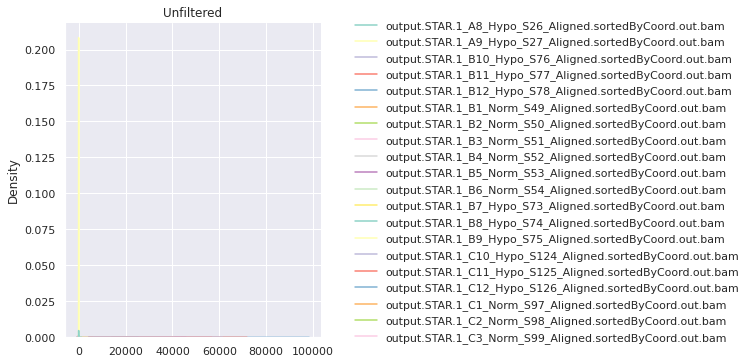

In [ ]:
df_small = df_unf_M.iloc[:, 10:30]
sns.displot(data=df_small,palette="Set3",kind="kde", bw_adjust=2).set(title='Unfiltered')


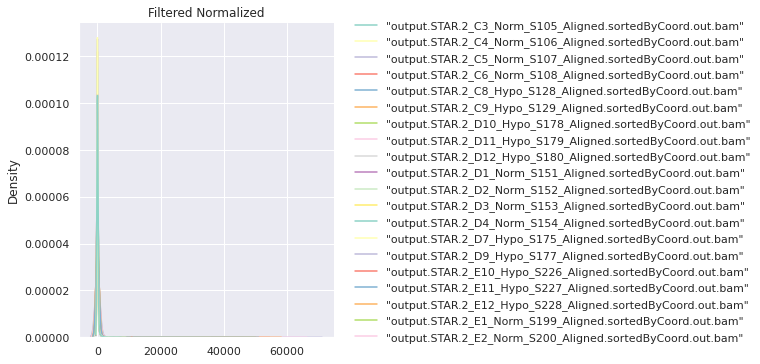

In [ ]:
df_fil_norm_M_small = df_fil_norm_M.iloc[:, 10:30]
sns.displot(data=df_fil_norm_M_small,palette="Set3",kind="kde", bw_adjust=2).set(title='Filtered Normalized')


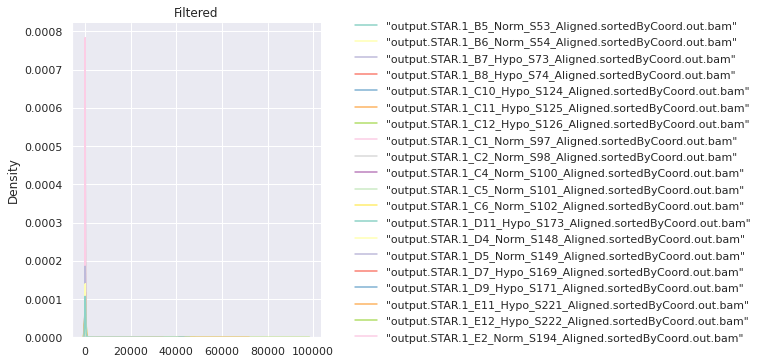

In [ ]:
df_fil_M_small = df_fil_M.iloc[:, 10:30]
sns.displot(data=df_fil_M_small,palette="Set3",kind="kde", bw_adjust=2).set(title='Filtered')


In order to normalize, one approach is to make the mean gene expression of all the cells the same. We achieve this by first fixing a target mean and then scaling each column by an appropiate number such that its mean becomes equal to our target. Then, we can round the resulting rational numbers to obtain integers again. We perform the normalization on the already filtered data. We choose the target to be the mean of all the values in the matrix in the "Filtered and Normalized" data set.

In [ ]:
target_mean = df_fil_norm_M.mean().mean()
normalized_df_fil_M = df_fil_M.copy()
for i in df_fil_M.columns[:10,]:
  #print(normalized_df_fil_M[i])
  normalized_df_fil_M[i] *= (target_mean/normalized_df_fil_M[i].mean())
  
#target_mean.mean()
#normalized_df_fil_M=
#normalized_df_fil_M_small = normalized_df_fil_M.iloc[:, 10:30]  #just selecting part of the samples so run time not too long

#sns.displot(data=normalized_df_unf_M_small,palette="Set3",kind="kde", bw_adjust=2).set(title='Filtered')

Another thing that we could take into account in our normalization is the gene lenght. We expect more reads to be attributed to longer genes. So we could search for an extra dataset for gene lenghts, and incorparate that into our analysis. There are many methods used for normalization: such as Quantile normalization, log2, RPKM, FPKM, and TPM. We do not implement them here. Some of these take into account the gene lenght we mentioned before.

In [ ]:
normalized_df_fil_M.var().mean()

376530.53251693514

In [ ]:
normalized_df_fil_M.loc[df_fil_norm_M.head(10).index,df_fil_norm_M.head(10).columns]

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.341108           
"CYP1B1-AS1"                                           1.342857           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                1.339378           
"PFKFB3"                                               1.346667           
"HK2"                                                       NaN           
"AREG"                                                      NaN           
"MYBL2"                                                1.352941           
"ADM"                                                       NaN           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.297710           
"CYP1B1-AS1"                                           1.305085           
"CYP1A1"                                                    NaN           
"NDRG1"                                                1.000000           
"DDIT4"                                                1.294118           
"PFKFB3"                                               1.309524           
"HK2"                                                       NaN           
"AREG"                                                 1.315421           
"MYBL2"                                                1.305170           
"ADM"                                                       NaN           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.435841           
"CYP1B1-AS1"                                           1.433498           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                     NaN           
"PFKFB3"                                                    NaN           
"HK2"                                                       NaN           
"AREG"                                                      NaN           
"MYBL2"                                                1.450323           
"ADM"                                                       NaN           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               0.888889           
"CYP1B1-AS1"                                           0.857143           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                0.909722           
"PFKFB3"                                               0.911215           
"HK2"                                                  0.933333           
"AREG"                                                 0.904959           
"MYBL2"                                                0.906801           
"ADM"                                                       NaN           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               0.821558           
"CYP1B1-AS1"                                           0.822405           
"CYP1A1"                                                    NaN           
"NDRG1"                                                0.818043           
"DDIT4"                                                0.822464           
"PFKFB3"                                               0.822208           
"HK2"                                                  0.819519           
"AREG"                                                 0.811927           
"MYBL2"                            

In [ ]:
df_fil_norm_M.var().head(50)

In [ ]:
df_fil_M.loc[df_fil_norm_M.head(10).index,df_fil_norm_M.head(10).columns]

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    460           
"CYP1B1-AS1"                                                188           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     517           
"PFKFB3"                                                    101           
"HK2"                                                         0           
"AREG"                                                        0           
"MYBL2"                                                     644           
"ADM"                                                         0           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    170           
"CYP1B1-AS1"                                                 77           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     374           
"PFKFB3"                                                     55           
"HK2"                                                         0           
"AREG"                                                     1126           
"MYBL2"                                                    2070           
"ADM"                                                         0           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    649           
"CYP1B1-AS1"                                                291           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           
"PFKFB3"                                                      0           
"HK2"                                                         0           
"AREG"                                                        0           
"MYBL2"                                                    1124           
"ADM"                                                         0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     24           
"CYP1B1-AS1"                                                  6           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     262           
"PFKFB3"                                                    195           
"HK2"                                                        14           
"AREG"                                                      219           
"MYBL2"                                                    1080           
"ADM"                                                         0           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   4779           
"CYP1B1-AS1"                                               2195           
"CYP1A1"                                                      0           
"NDRG1"                                                     535           
"DDIT4"                                                    2043           
"PFKFB3"                                                   1318           
"HK2"                                                       613           
"AREG"                                                      354           
"MYBL2"                            

In [ ]:
df_fil_M.loc[df_fil_norm_M.head(10).index,df_fil_norm_M.head(10).columns]/df_fil_norm_M.head(10)

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.341108           
"CYP1B1-AS1"                                           1.342857           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                1.339378           
"PFKFB3"                                               1.346667           
"HK2"                                                       NaN           
"AREG"                                                      NaN           
"MYBL2"                                                1.352941           
"ADM"                                                       NaN           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.297710           
"CYP1B1-AS1"                                           1.305085           
"CYP1A1"                                                    NaN           
"NDRG1"                                                1.000000           
"DDIT4"                                                1.294118           
"PFKFB3"                                               1.309524           
"HK2"                                                       NaN           
"AREG"                                                 1.315421           
"MYBL2"                                                1.305170           
"ADM"                                                       NaN           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               1.435841           
"CYP1B1-AS1"                                           1.433498           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                     NaN           
"PFKFB3"                                                    NaN           
"HK2"                                                       NaN           
"AREG"                                                      NaN           
"MYBL2"                                                1.450323           
"ADM"                                                       NaN           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               0.888889           
"CYP1B1-AS1"                                           0.857143           
"CYP1A1"                                                    NaN           
"NDRG1"                                                     NaN           
"DDIT4"                                                0.909722           
"PFKFB3"                                               0.911215           
"HK2"                                                  0.933333           
"AREG"                                                 0.904959           
"MYBL2"                                                0.906801           
"ADM"                                                       NaN           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                               0.821558           
"CYP1B1-AS1"                                           0.822405           
"CYP1A1"                                                    NaN           
"NDRG1"                                                0.818043           
"DDIT4"                                                0.822464           
"PFKFB3"                                               0.822208           
"HK2"                                                  0.819519           
"AREG"                                                 0.811927           
"MYBL2"                            

In [ ]:
normalized_df_unf_M.describe()

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04          
mean                                       -2.267560e-15          
std                                         1.000000e+00          
min                                        -8.764608e-02          
25%                                        -8.764608e-02          
50%                                        -8.764608e-02          
75%                                        -5.114267e-02          
max                                         1.002838e+02          

       output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04          
mean                                       -1.240461e-15          
std                                         1.000000e+00          
min                                        -5.898431e-02          
25%                                        -5.898431e-02          
50%                                        -5.898431e-02          
75%                                        -5.898431e-02          
max                                         6.733763e+01          

       output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04          
mean                                        9.890892e-16          
std                                         1.000000e+00          
min                                        -8.339251e-02          
25%                                        -8.339251e-02          
50%                                        -8.339251e-02          
75%                                        -7.856892e-02          
max                                         7.906880e+01          

       output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04        
mean                                        7.061228e-15        
std                                         1.000000e+00        
min                                        -1.680458e-01        
25%                                        -1.680458e-01        
50%                                        -1.680458e-01        
75%                                        -1.680458e-01        
max                                         4.722950e+01        

       output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04        
mean                                        2.985298e-15        
std                                         1.000000e+00        
min                                        -1.173771e-01        
25%                                        -1.173771e-01        
50%                                        -1.173771e-01        
75%                                        -6.083456e-02        
max                                         8.535883e+01        

       output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04        
mean                                        5.991940e-15        
std                                         1.000000e+00        
min                                        -1.116237e-01        
25%                                        -1.116237e-01        
50%                                        -1.116237e-01        
75%                                        -6.595248e-02        
max                                         9.293063e+01        

       output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam  \
count                                       2.293400e+04        
mean                                       -4.630742e-15        
std                                         1.000000e+00        
min                                        -1.751502e-01        
25%                                        -1.751502e-01        
50%                                        -1.7

After the normalization, we figured another problem that could come up when dealing with such big datasets would be accidentaly having duplicate rows, since data could be "inserted" twice. Once again we start with MCF7 to show the analysis part and then apply to HCC1806 as well.

In [ ]:
duplicate_rows_df_unf_M = df_unf_M[df_unf_M.duplicated(keep=False)]
print("number of duplicate rows: ", duplicate_rows_df_unf_M.shape)
print("number of duplicate rows: ", duplicate_rows_df_unf_M)

number of duplicate rows:  (56, 383)
number of duplicate rows:                   output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
SHISAL2A                                                         0          
IL12RB2                                                          0          
S1PR1                                                            0          
CD84                                                             0          
GNLY                                                             0          
FAR2P3                                                           0          
KLF2P3                                                           0          
PABPC1P2                                                         0          
UGT1A8                                                           0          
UGT1A9                                                           0          
SLC22A14                                                         0          
COQ10BP2    

We could check case by case whether to remove. First let's understand where the duplicates really are.

In [ ]:
duplicate_rows_df_t_unf_M = duplicate_rows_df_unf_M.T
duplicate_rows_df_t_unf_M
c_dupl = duplicate_rows_df_t_unf_M.corr()
c_dupl

SHISAL2A   IL12RB2     S1PR1      CD84      GNLY    FAR2P3  \
SHISAL2A         1.000000  0.630630  0.654887  0.312826  0.497375 -0.008333   
IL12RB2          0.630630  1.000000  0.829681  0.799056  0.630630 -0.007903   
S1PR1            0.654887  0.829681  1.000000  0.412553  0.654887 -0.007656   
CD84             0.312826  0.799056  0.412553  1.000000  0.312826 -0.007903   
GNLY             0.497375  0.630630  0.654887  0.312826  1.000000 -0.008333   
FAR2P3          -0.008333 -0.007903 -0.007656 -0.007903 -0.008333  1.000000   
KLF2P3          -0.008333 -0.007903 -0.007656 -0.007903 -0.008333  1.000000   
PABPC1P2         0.497375  0.948434  0.654887  0.948434  0.497375 -0.008333   
UGT1A8          -0.009322 -0.008841 -0.008565 -0.008841 -0.009322 -0.014798   
UGT1A9          -0.009322 -0.008841 -0.008565 -0.008841 -0.009322 -0.014798   
SLC22A14         0.497375  0.948434  0.654887  0.948434  0.497375 -0.008333   
COQ10BP2         1.000000  0.630630  0.654887  0.312826  0.497375 -0.008333   
PANDAR          -0.020348 -0.019299 -0.018695 -0.019299 -0.020348 -0.032300   
LAP3P2          -0.020348 -0.019299 -0.018695 -0.019299 -0.020348 -0.032300   
RPL22P16        -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
GALNT17          0.630630  1.000000  0.829681  0.799056  0.630630 -0.007903   
PON1             0.630630  1.000000  0.829681  0.799056  0.630630 -0.007903   
HTR5A           -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
SNORA36A        -0.004499 -0.004267 -0.004134 -0.004267 -0.004499 -0.007142   
MIR664B         -0.004499 -0.004267 -0.004134 -0.004267 -0.004499 -0.007142   
CSMD1            0.112487  0.586533  0.149322  0.955646  0.112487 -0.006775   
KCNS2            0.497375  0.630630  0.654887  0.312826  1.000000 -0.008333   
MIR548AA1       -0.004979 -0.004722 -0.004574 -0.004722 -0.004979 -0.007903   
MIR548D1        -0.004979 -0.004722 -0.004574 -0.004722 -0.004979 -0.007903   
MTCO2P11        -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
CLCN3P1          0.134926  0.612365  0.178813  0.964653  0.134926 -0.006928   
SUGT1P4-STRA6LP  0.001061 -0.021672 -0.020994 -0.021672 -0.022850  0.173251   
STRA6LP          0.001061 -0.021672 -0.020994 -0.021672 -0.022850  0.173251   
MUC6             0.654887  0.829681  1.000000  0.412553  0.654887 -0.007656   
VSTM4            0.497375  0.630630  0.654887  0.312826  0.497375 -0.008333   
LINC00856       -0.007671 -0.007275  0.028008 -0.007275 -0.007671 -0.012177   
LINC00595       -0.007671 -0.007275  0.028008 -0.007275 -0.007671 -0.012177   
CACYBPP1        -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
LINC00477       -0.007029 -0.006667 -0.006458 -0.006667 -0.007029 -0.011158   
KNOP1P1         -0.007029 -0.006667 -0.006458 -0.006667 -0.007029 -0.011158   
WDR95P           0.312826  0.799056  0.412553  1.000000  0.312826 -0.007903   
MIR20A          -0.004979 -0.004722 -0.004574 -0.004722 -0.004979 -0.007903   
MIR19B1         -0.004979 -0.004722 -0.004574 -0.004722 -0.004979 -0.007903   
RPL21P5          0.497375  0.630630  0.654887  0.312826  0.497375 -0.008333   
RNU6-539P       -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
SNRPN           -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
SNURF           -0.005249 -0.004979 -0.004823 -0.004979 -0.005249 -0.008333   
RBFOX1           0.497375  0.630630  0.654887  0.312826  0.497375 -0.008333   
LINC02183        0.630630  0.799056  0.829681  0.397167  0.948434 -0.007903   
MT1M             0.630630  0.799056  0.829681  0.397167  0.630630 -0.007903   
ASPA             0.630630  0.799056  0.829681  0.397167  0.630630 -0.007903   
BCL6B            0.497375  0.630630  0.654887  0.312826  1.000000 -0.008333   
CCL3L3          -0.007615 -0.007222 -0.006996 -0.007222  0.021357 -0.012088   
CCL3L1          -0.007615 -0.007222 -0.006996 -0.007222  0.021357 -0.012088   
OTOP3            0.134926  0.612365  0.178813  0.964653  0.134926 -

In [ ]:
duplicate_rows_df_t_unf_M.describe()

SHISAL2A     IL12RB2       S1PR1        CD84        GNLY      FAR2P3  \
count  383.000000  383.000000  383.000000  383.000000  383.000000  383.000000   
mean     0.005222    0.007833    0.018277    0.007833    0.005222    0.013055   
std      0.072168    0.114138    0.274921    0.114138    0.072168    0.113658   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    2.000000    5.000000    2.000000    1.000000    1.000000   

           KLF2P3    PABPC1P2      UGT1A8      UGT1A9  ...       BCL6B  \
count  383.000000  383.000000  383.000000  383.000000  ...  383.000000   
mean     0.013055    0.005222    0.704961    0.704961  ...    0.005222   
std      0.113658    0.072168    5.486218    5.486218  ...    0.072168   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000   78.000000   78.000000  ...    1.000000   

           CCL3L3      CCL3L1       OTOP3   RNA5SP450        PSG1     MIR3190  \
count  383.000000  383.000000  383.000000  383.000000  383.000000  383.000000   
mean     0.394256    0.394256    0.015666    0.005222    0.005222    0.005222   
std      3.756135    3.756135    0.260417    0.072168    0.072168    0.072168   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     66.000000   66.000000    5.000000    1.000000    1.000000    1.000000   

          MIR3191       SEZ6L     ADAMTS5  
count  383.000000  383.000000  383.000000  
mean     0.005222    0.018277    0.007833  
std      0.072168    0.310683    0.114138  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    6.000000    2.000000  

[8 rows x 56 columns]

In [ ]:
df_unf_M_noDup = df_unf_M.drop_duplicates()

In [ ]:
df_unf_M_noDup.count()

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    22905
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    22905
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    22905
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      22905
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      22905
                                                            ...  
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    22905
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    22905
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    22905
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    22905
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    22905
Length: 383, dtype: int64

And for HCC1806:


In [ ]:
duplicate_rows_df_unf_H = df_unf_H[df_unf_H.duplicated(keep=False)]

df_unf_M_noDup = df_unf_H.drop_duplicates()
df_unf_M_noDup.count()

output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    23342
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     23342
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       23342
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      23342
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        23342
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    23342
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    23342
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      23342
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     23342
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     23342
Length: 243, dtype: int64

_______________________

Lastly we can explore the data structure and try to find correlations between features, and samples, and try to visualize them using plots, at first with some heatmaps and then with some pairplots.

Number of cells included:  (250, 250)
Average correlation of expression profiles between cells:  0.5639485686581565
Min. correlation of expression profiles between cells:  0.12789713731631308


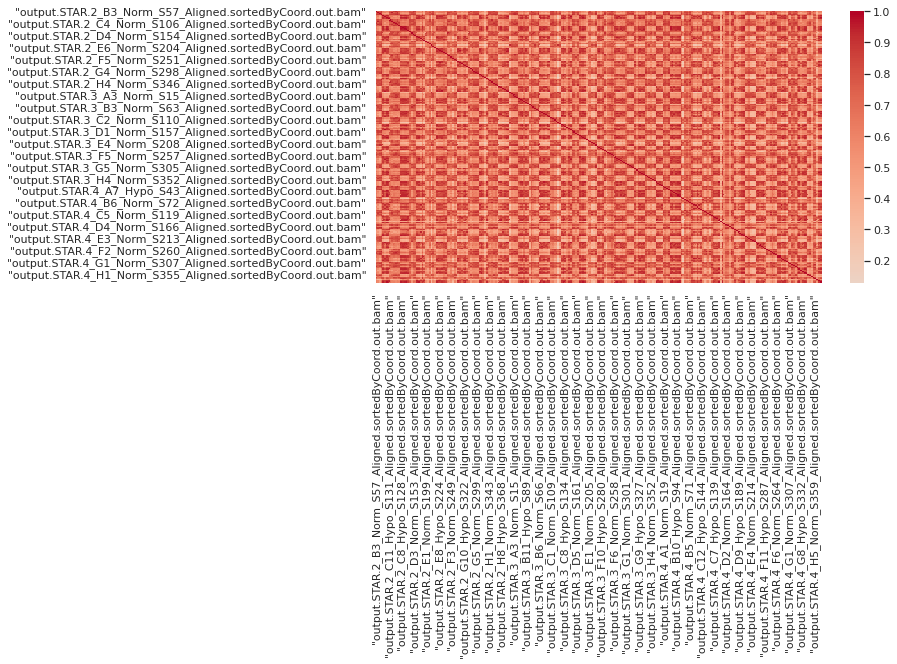

In [ ]:
plt.figure(figsize=(10,5))

c= df_M_filt_norm.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()

sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c.values.min())

Number of cells included:  (182, 182)
Average correlation of expression profiles between cells:  0.5751305051213959
Min. correlation of expression profiles between cells:  0.1502610102427917


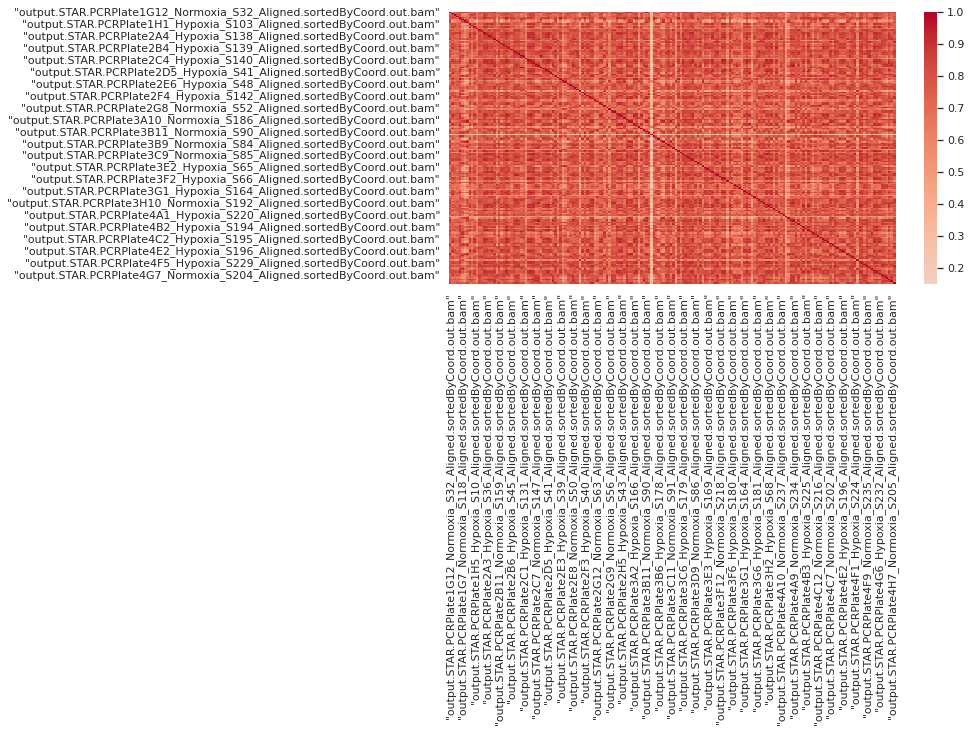

In [ ]:
plt.figure(figsize=(10,5))

c= df_H_filt_norm.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()

sns.heatmap(c,cmap='coolwarm', center=0 )
print("Number of cells included: ", np.shape(c))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c.values.min())

We can see by the diagonal line that there seems to be a correlation but because of the size of the data we cant really understand, so we once again scale it down by choosing a partition of the data

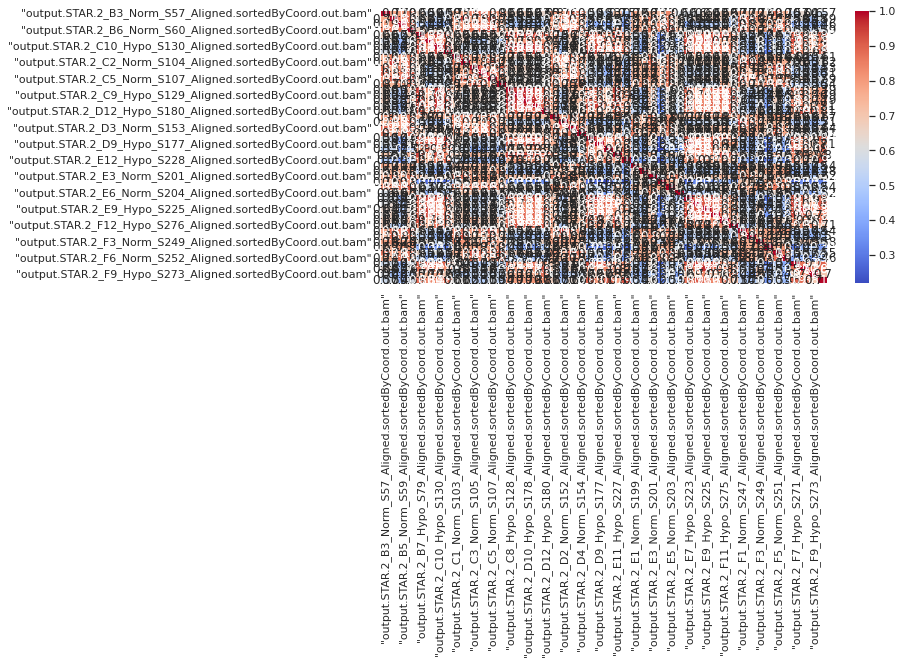

In [ ]:
plt.figure(figsize=(10,5))
df_small = df_M_filt_norm.iloc[:, :50]
c= df_small.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )


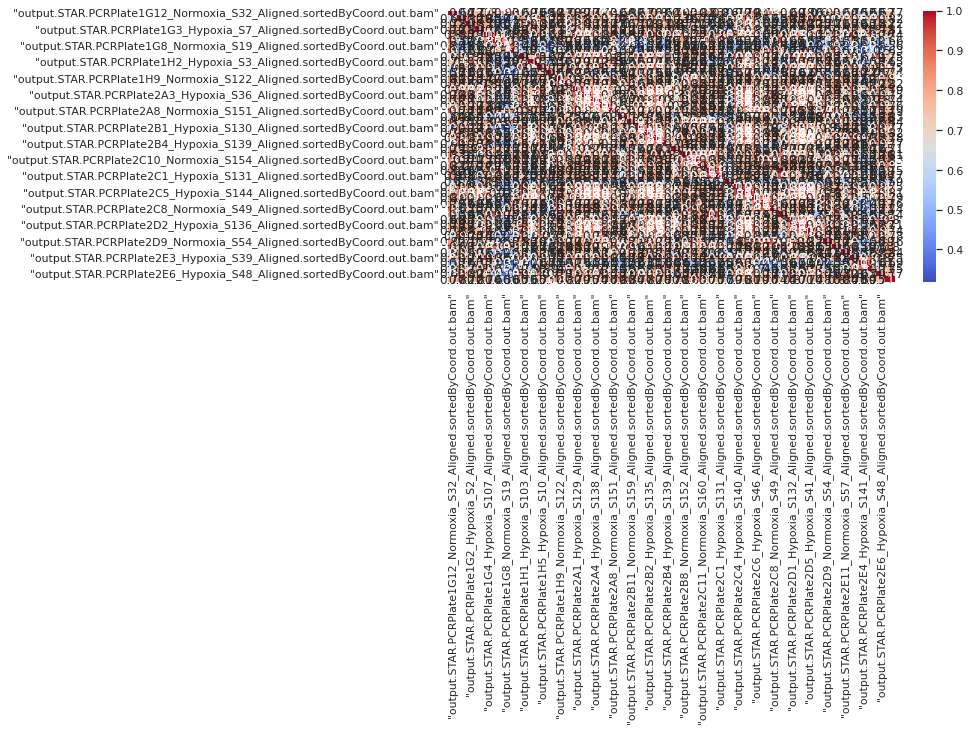

In [ ]:
plt.figure(figsize=(10,5))
df_small = df_H_filt_norm.iloc[:, :50]
c= df_small.corr()
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()
sns.heatmap(c,cmap='coolwarm',annot=True, center=midpoint )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: ignored

<Figure size 720x360 with 0 Axes>

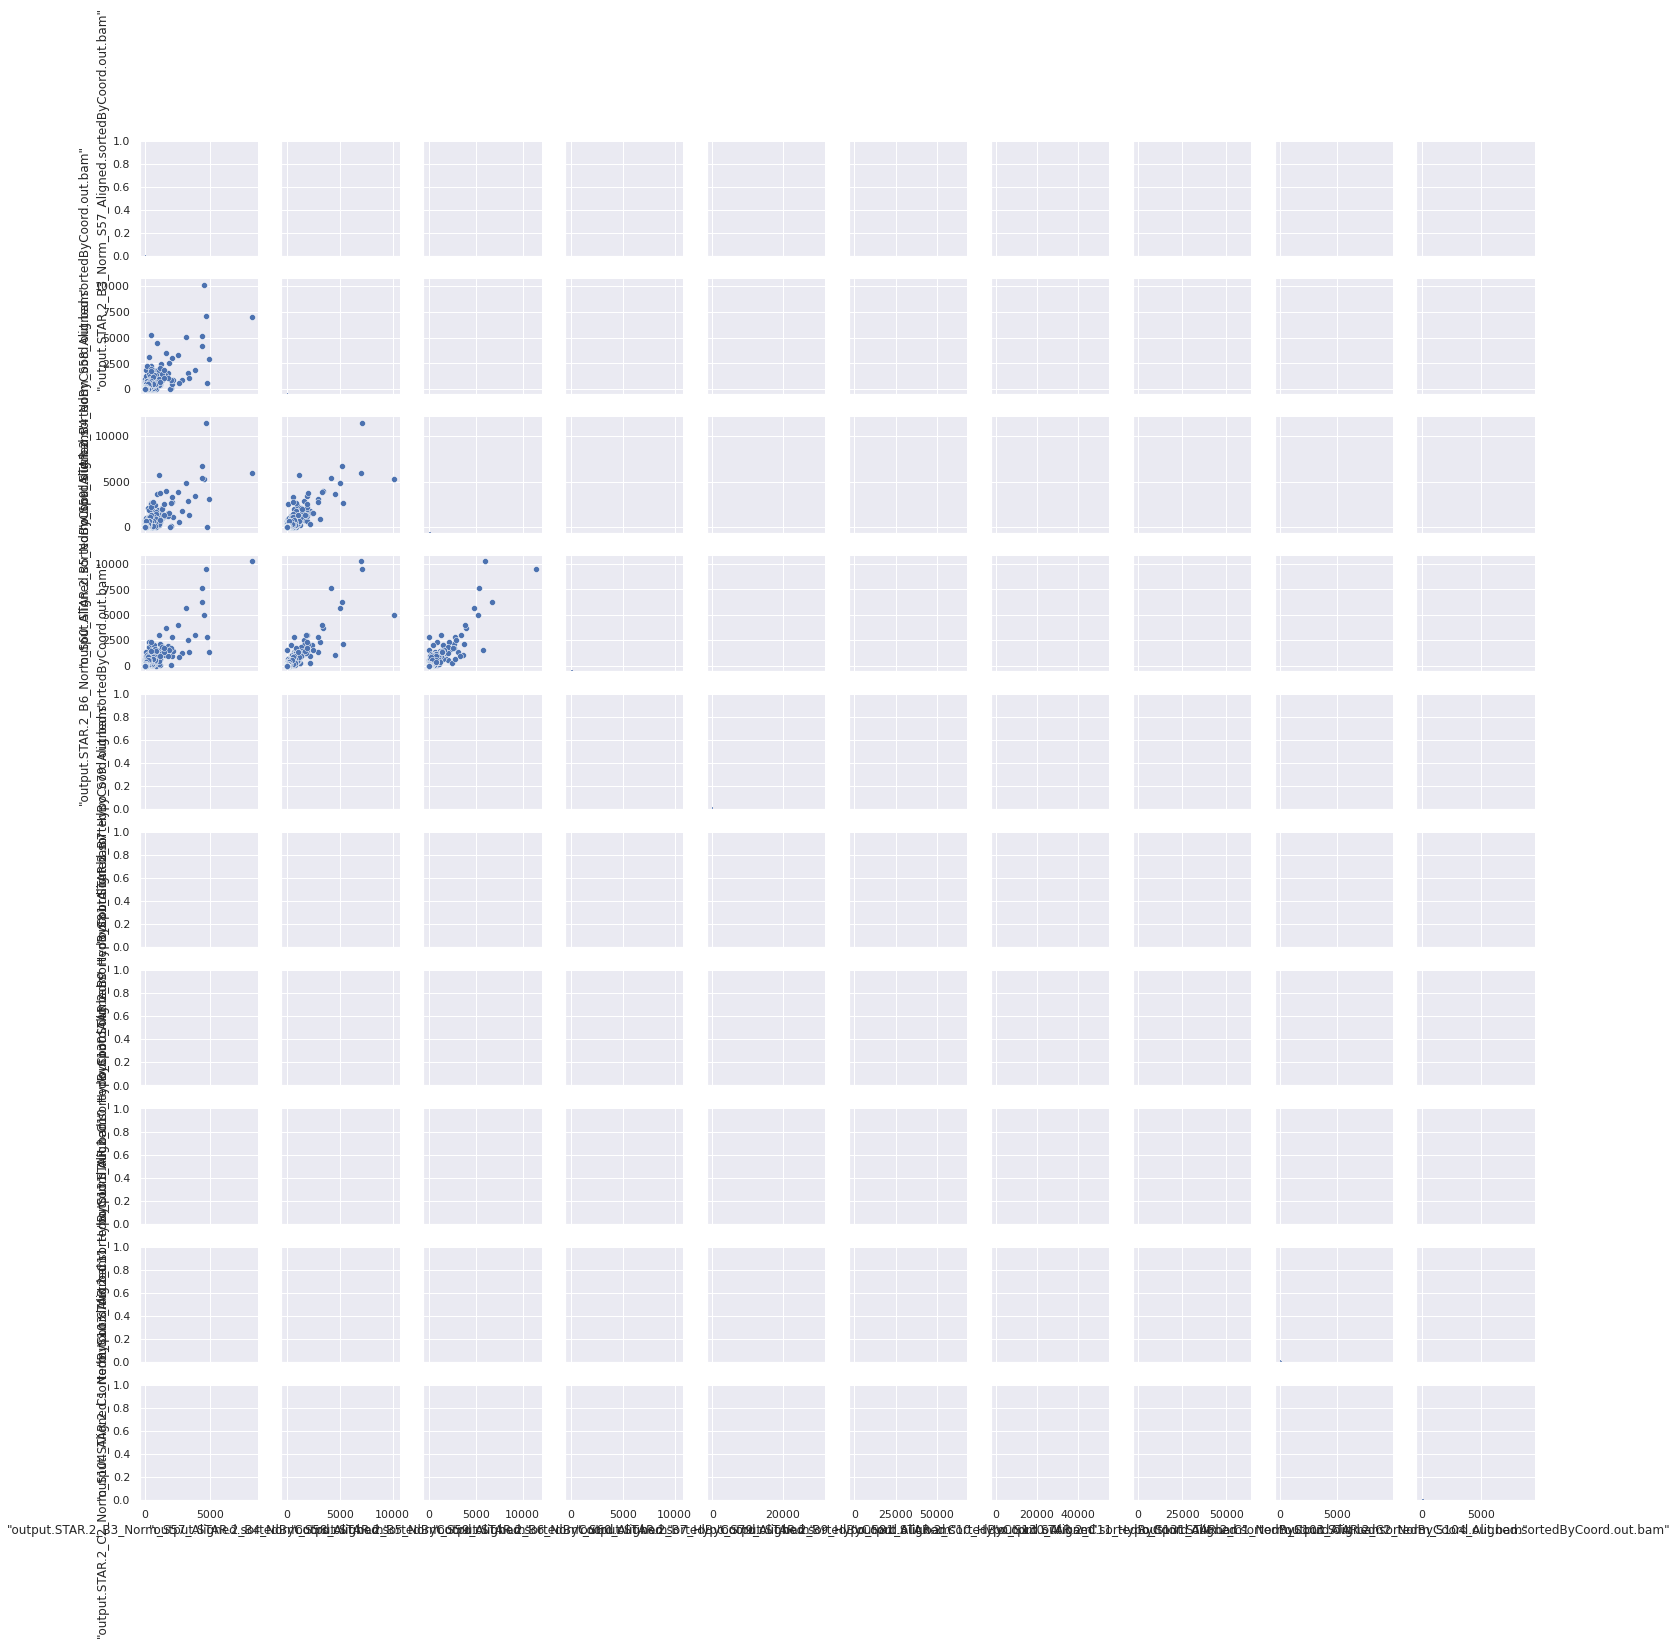

In [ ]:
plt.figure(figsize=(10,5))
df_small = df_M_filt_norm.iloc[:, :10]

sns.pairplot(df_small )

In [ ]:
plt.figure(figsize=(10,5))
df_small = df_H_filt_norm.iloc[:, :10]

sns.pairplot(df_small )

We tried running a pairplot but even with a very small partition of the data it took more than two hours so we can try and analyzing the few examples we have, otherwise it would take days or way more computing power to be able to have a complete and conclusive result.


Lastly we can look the distribution correlation between gene expression profiles using histograms

In [ ]:
c=df_M_filt_norm.corr()
np.shape(c)
type(c)
c.head(3)
c_small=c.iloc[:,:4]
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(c_small,bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

Text(0.5, 0, 'Correlation between cells expression profiles')

Text(0.5, 0, 'Correlation between cells expression profiles')

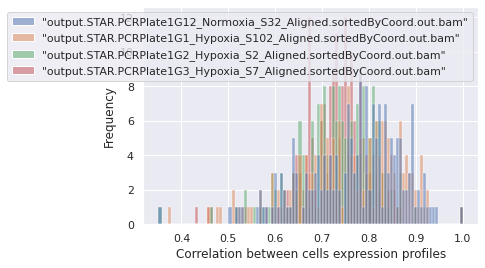

In [ ]:
c=df_H_filt_norm.corr()
np.shape(c)
type(c)
c.head(3)
c_small=c.iloc[:,:4]
sns.histplot(c_small,bins=100)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')

For MCF7 we see that the correlation distribution seems similar in all cases but they are shifted between them, whereas in the seconc case for HCC1806 the correlation distribution is almost identical for all the cases, and we can see that given enough cases it would have the shape of a normal distribution

_______________________

## Unsupervised Learning

From this step, we will use filtered and normalized data. 
However, we need to further simplify our dataset, since it has high-dimensional measurements. 
For this reason we want to extract the most relevat information from a high-dimensional space and mapping them into a lower dimensional one. 
To do so, we will use Principal Component Analysis (PCA) and the Isomap Method.

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [ ]:
#df_meta=pd.read_csv('C:\\Users\Luca\\Desktop\\SmartSeq\\HCC1806_SmartS_MetaData.tsv',delimiter="\t",engine='python',index_col=0)
#df_meta=pd.read_csv('C:\\Users\Luca\\Desktop\\SmartSeq\\MCF7_SmartS_MetaData.tsv',delimiter="\t",engine='python',index_col=0)
#df_meta

In [ ]:
df1 = df_drop + 1
df1_log2 = df1.apply(np.log2)
df_drop = df1_log2
transpose_drop = df_drop.T 
v = pd.DataFrame(transpose)
features = transpose_drop.columns
print(v)
#X= df.to_numpy()
#X_t = np.transpose(X)


                           "H1-5"  "MALAT1"  "MT-RNR2"  "ARVCF"  "BCYRN1"  \
"AAAAAACCCGGC_Normoxia"  1.584963  2.000000        0.0      0.0       0.0   
"AAAACCGGATGC_Normoxia"  1.584963  2.000000        0.0      0.0       1.0   
"AAAACGAGCTAG_Normoxia"  2.584963  1.584963        0.0      0.0       1.0   
"AAAACTTCCCCG_Normoxia"  1.000000  2.000000        0.0      0.0       0.0   
"AAAAGCCTACCC_Normoxia"  0.000000  3.700440        0.0      0.0       0.0   
...                           ...       ...        ...      ...       ...   
"TTTTTACCAATC_Hypoxia"   0.000000  0.000000        0.0      0.0       0.0   
"TTTTTCCGTGCA_Hypoxia"   0.000000  2.321928        1.0      0.0       0.0   
"TTTTTGCCTGGG_Hypoxia"   0.000000  1.000000        0.0      0.0       1.0   
"TTTTTGTAACAG_Hypoxia"   2.000000  2.000000        1.0      0.0       0.0   
"TTTTTTTGAATC_Hypoxia"   1.000000  2.807355        0.0      0.0       0.0   

                         "ATXN7L2"  "IGFBP3"    "H1-3"  "CTIF"  "RNF123"  .

In [ ]:
cells = transpose_drop.index
transpose_drop['label'] = 0
for i in range(14682):
    if 'Hypoxia' in str(cells[i]):
        transpose_drop['label'].values[i] = 1
        

x_drop = transpose_drop.loc[:, features].values
        
print(transpose_drop['label'])

"AAAAAACCCGGC_Normoxia"    0
"AAAACCGGATGC_Normoxia"    0
"AAAACGAGCTAG_Normoxia"    0
"AAAACTTCCCCG_Normoxia"    0
"AAAAGCCTACCC_Normoxia"    0
                          ..
"TTTTTACCAATC_Hypoxia"     1
"TTTTTCCGTGCA_Hypoxia"     1
"TTTTTGCCTGGG_Hypoxia"     1
"TTTTTGTAACAG_Hypoxia"     1
"TTTTTTTGAATC_Hypoxia"     1
Name: label, Length: 14682, dtype: int64


### PCA
The purpose of applying PCA is to reduce the dimensionality of the data while maintaining as much variance as possible. 
It does so by projecting the directions of maximum variance onto a lower dimension subspace.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_drop)

In [ ]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',' 3'])
principal_Df.tail()

principal component 1  principal component 2         3
14677              -0.420694              -2.436005  0.800078
14678              -1.489586               0.062884  1.332660
14679               1.153527              -0.587967  0.224152
14680              -0.803146               1.896055  1.699942
14681               0.991556              -0.595890  1.696404

<Figure size 432x288 with 0 Axes>

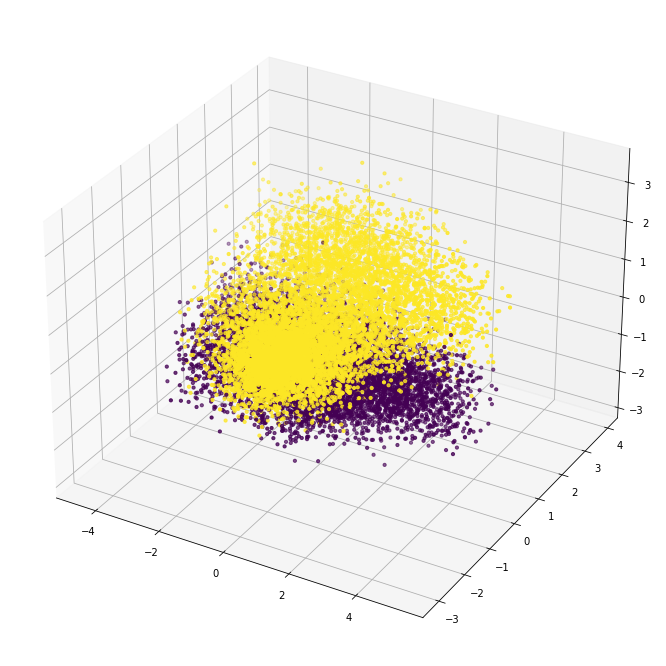

In [ ]:
plt.figure()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(principalComponents[:,0],principalComponents[:,1], principalComponents[:,2], c =transpose_drop['label'], s = 10)
plt.show()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.03816668 0.02392999 0.0147298 ]


In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)


original shape:    (14682, 3000)
transformed shape: (14682, 2)


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_t)
X_pca = pca.transform(X_t)
print("original shape:   ", X_t.shape)
print("transformed shape:", X_pca.shape)

original shape:    (250, 3000)
transformed shape: (250, 2)


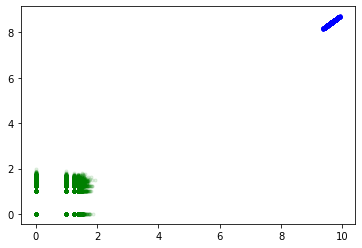

In [ ]:
x_new = pca.inverse_transform(x_pca)
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c="green", s = 10, alpha = 0.1)
plt.scatter(x_new[:, 0], x_new[:, 1], c="blue", s=10, alpha = 1)
plt.show() 


### IsoMap
Isomap is a non-linear way of reducing dimentionality while preserving local structures. It's actually a combination of different algorithms: k-nearest neighbors (KNN), a shortest path algorithm (which could be the Dijkstra’s algorithm, for example), and Multidimensional Scaling (MDS). 
Isomap is distinguished from MDS by the preservation of geodesic distances, which results in the preservation of manifold structures in the resulting embedding.

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(x)
X_reduced_isomap.shape

(14682, 2)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap_s = isomap.fit_transform(X_t)
X_reduced_isomap_s.shape

(250, 2)

### Comparison of dimensionality reduction methods

Comparison between PCA and Isomap.
Let's start by comparing the computational power required to do both reductions. As we can expect, Isomap requires a lot of time and power due to its non-linear nature, as opposed to PCA, which is lighter and faster.
In addition, Isomap does a better job in preserving geodesic distances and therefore manifold structures, while PCA preserves global data structure better.

### Clustering using K-means


Inertia is the sum of squared distance of samples to their closest cluster center. Logically, we would like this number to be as small as possible.

- Using the data obtained from PCA

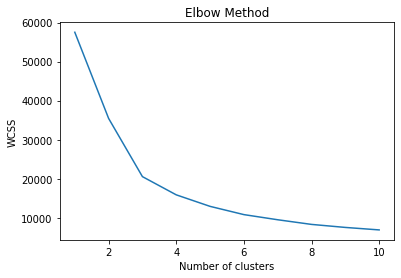

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

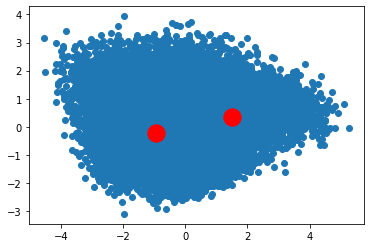

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
kmeans.inertia_

35450.86086287091

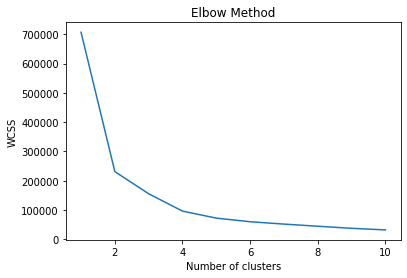

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

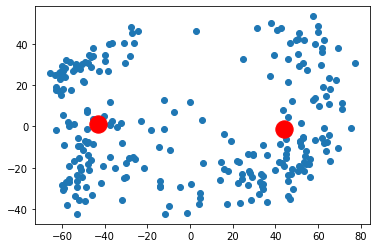

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
kmeans.inertia_

230980.32284828526

- Using the data obtained from IsoMap

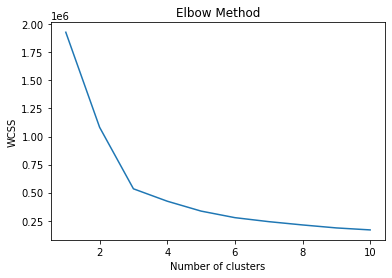

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_isomap)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

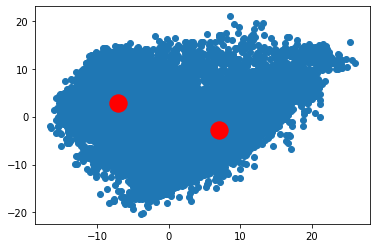

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_isomap)
plt.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
kmeans.inertia_

1082264.2828079986

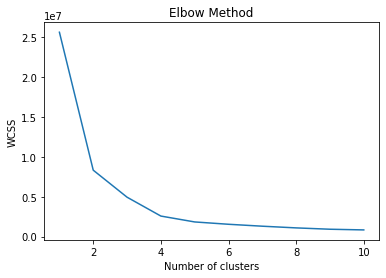

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced_isomap_s)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

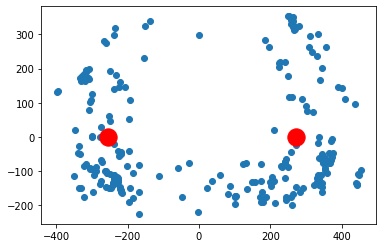

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_reduced_isomap_s)
plt.scatter(X_reduced_isomap_s[:,0], X_reduced_isomap_s[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
kmeans.inertia_

8324491.896551373

- Using the non-reduced data

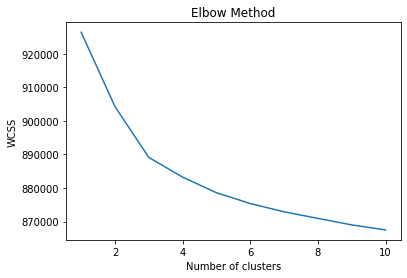

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

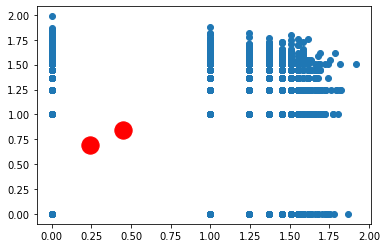

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

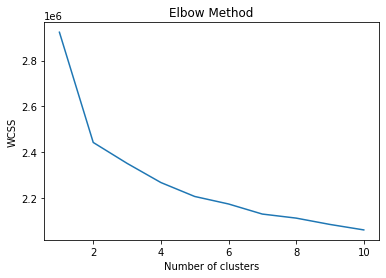

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_t)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

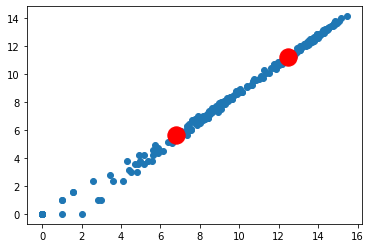

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_t)
plt.scatter(X_t[:,0], X_t[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Conclusions
It can be seen that there is a clear difference between DropSeq and SmartSeq Rna methods from
the results of the analysis. SmartSeq gave us plain and defined clusters after dimensions were reduced (more precisely, 2 well defined clusters were found).
On the other hand, DropSeq merely gave us a bunch of stacked points which correspond to two very compact clusters. 
Therefore, the Smartseq shows the distinction between cells with normoxia and hypoxia, whereas dropseq is just overflowing with data that is not essential, even after being cleaned and reduced.

Moreover, to decide the number of clusters we decided to follow the elbow method. 
This method looks at the total "within cluster sum square" as a function of the number of clusters.
In this way, one should choose a number of clusters, so that adding another cluster will not improve the total "within cluster sum square" by much.
In the graphs, clusters are represented by the point at which the growth of curves approaches 0.

## Supervised Learning

For the supervised part, we first start by finding the best classifiers for our train sets which are reduced by PCA. Later we also look into feature selection and how they would work with our classifiers. Eventually we compare the performance of our classifiers in different test sets and propose to build a general predictor.

### Classification with PCA

We first start with creating our target set (which we call cond__). For the SmartSeq Part we will follow the same procedure: Since reducing the dimension of the features using PCA with explained variance ratio of 0.95 gives us a pretty good dimensionality reduction to dimension 20, we will continue using it. We then start to develop different classifiers and look at their mean score after 10-fold crossvalidating.

 Let's start with SmartSeq MCF7:

#### SmartSeq MCF7

In [ ]:
df_meta_M = pd.read_csv("drive/MyDrive/Lab/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta_M))

Dataframe dimensions: (383, 8)


In [ ]:
df_MS = pd.read_csv( "drive/MyDrive/Lab/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt" , delimiter=" " , engine="python" , index_col=0)
print("Dataframe dimensions:", np.shape(df_MS))



Dataframe dimensions: (3000, 250)


In [ ]:
df_MST=np.transpose(df_MS)


In [ ]:
df_meta_M.loc[df_meta_M["Condition"]=="Hypo", "Condition"] = 1
df_meta_M.loc[df_meta_M["Condition"]=="Norm", "Condition"] = 0
index = df_MS.T.index
new = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    new[i] = not 'Norm' in index[i] # 1 Hypo 0 Norm
new = new.tolist()
df_label_M = pd.DataFrame(new, columns = ['Column_A'])
samples = df_MS.columns
df_label_M.index = samples
condMS = df_label_M.T.iloc[0]
condMS

output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam     0
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam     0
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam     0
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam     0
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam     1
                                                           ..
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    1
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    1
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    1
Name: Column_A, Length: 250, dtype: int64

PCA of SmartSeq MCF7 reduces to dimension 20:

In [ ]:
XMS_reduced_pca, pcaMS=pcafit(df_MST)
XMS_reduced_pca.shape 

NameError: ignored

After having reduced the dimension to a practical size, we will start to evaluate possible classifiers. We will look at different classifiers: SVM, Perceptron, Decision Tree, Random Forest, Logistic Regression and finally hard voting. To find optimal parameters for our fit we use GridSearchCV, which takes our predefined parameters and tests them out to find the best fit.

######SVM

In [ ]:
sv=svm.SVC(random_state=42)
paramssvMS={
    "kernel" : ("linear", "poly", "rbf", "sigmoid"),
    "degree": [3, 5, 10, 25],
    "gamma": ("scale", "auto"),
    "C": [1.0,2.0, 5.0, 10.0, 15.0],
}
svMSfit=GridSearchCV(sv, paramssvMS)
svMSfit.fit(XMS_reduced_pca, condMS)
scoressvMS = cross_val_score(svMSfit, XMS_reduced_pca, condMS, cv=10)
scoressvMS
# svfit.best_params_

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.92, 1.  , 1.  , 1.  , 0.84])

In [ ]:
scoressvMS.mean()

0.976

In [ ]:
svMSfit.best_params_

{'C': 10.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid'}

So we found our best fitting parameters (for now only for SVM). An obvious limitation is that we pick the parameters by ourselves. We tried changing them a bit by brute force, but it should give better classifiers if we could iterate over a larger parameter space, however this was computationally difficult.

For now we repeat the procedure:

######Decision Tree

In [ ]:

dtMS = DecisionTreeClassifier(random_state=42)
paramsdtMS={
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "max_depth": [1, 5, 10, 25, 50 , 100,len(XMS_reduced_pca[:])],

}
dtMSfit=GridSearchCV(dtMS, paramsdtMS)
dtMSfit.fit(XMS_reduced_pca, condMS)
scoresdtMS = cross_val_score(dtMS, XMS_reduced_pca, condMS, cv=10)
scoresdtMS

array([1.  , 0.96, 1.  , 1.  , 0.96, 0.92, 1.  , 1.  , 0.96, 0.84])

In [ ]:
dtMSfit.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

######Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfMS=RandomForestClassifier(random_state=42)
paramsrfMS = {
    "n_estimators" : [1,10],
    "criterion" :("gini", "entropy"),
    "max_depth": [1, 5, 10],
    "min_samples_split" : [2,],
    "max_features": ("sqrt", "log2")
    
}
rfMSfit=clfd=GridSearchCV(rfMS, paramsrfMS)
rfMSfit.fit(XMS_reduced_pca, condMS)
rfMSscores = cross_val_score(rfMSfit, XMS_reduced_pca, condMS, cv=10)
rfMSscores

array([1.  , 1.  , 1.  , 1.  , 0.96, 0.92, 1.  , 1.  , 1.  , 0.92])

In [ ]:
rfMSfit.best_params_


{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 1}

######Perceptron


In [ ]:
from sklearn.linear_model import Perceptron
perMS=Perceptron(random_state=42)
paramsperMS = {
    "penalty" : ("l2", "l1", "elasticnet", "None"),

    "alpha" :[0.0001, 0.001, 0.0001 ],
    "eta0": [0.5, 1, 2, 5],

}
perMSfit=GridSearchCV(perMS, paramsperMS)
perMSfit.fit(XMS_reduced_pca, np.array(condMS))
scoresperMS = cross_val_score(perMSfit, XMS_reduced_pca, np.array(condMS), cv=10)
scoresperMS

array([1.  , 0.92, 1.  , 1.  , 1.  , 0.96, 1.  , 1.  , 1.  , 1.  ])

In [ ]:
perMSfit.best_params_

{'alpha': 0.001, 'eta0': 5, 'penalty': 'elasticnet'}

######Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logMS=LogisticRegression(random_state=42)
paramslogMS = {
    "C" : [0.5, 1, 2, 5, 10],

    "solver" :("newton-cg", "lbfgs", "liblinear"),
    "multi_class": ("auto", "ovr"),

}
logMSfit=GridSearchCV(logMS, paramslogMS)
logMSfit.fit(XMS_reduced_pca, condMS)
scoreslogMS = cross_val_score(logMSfit, XMS_reduced_pca, condMS, cv=10)
scoreslogMS

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.96, 1.  , 1.  , 1.  , 1.  ])

In [ ]:
logMSfit.best_params_

{'C': 0.5, 'multi_class': 'auto', 'solver': 'liblinear'}

######Voting Hard

In [ ]:
print("SVM: ", scoressvMS.mean(), ", ", scoressvMS.std())
print("DT: ", scoresdtMS.mean(), ", ", scoresdtMS.std())
print("RF: ", rfMSscores.mean(), ", ", rfMSscores.std())
print("Per: ", scoresperMS.mean(), ", ", scoresperMS.std())
print("Log: ", scoreslogMS.mean(), ", ", scoreslogMS.std())

SVM:  0.976 ,  0.05122499389946279
DT:  0.9640000000000001 ,  0.04882622246293482
RF:  0.9799999999999999 ,  0.032249030993194185
Per:  0.9879999999999999 ,  0.02561249694973139
Log:  0.9960000000000001 ,  0.012000000000000009


In [ ]:
from sklearn.ensemble import VotingClassifier
votingMS=VotingClassifier(estimators=[("Per", perMSfit), ("rf", rfMSfit), ("lr",logMSfit)],voting="hard")
votingMS.fit(XMS_reduced_pca, condMS)
scoresvoteMS = cross_val_score(votingMS, XMS_reduced_pca, condMS, cv=10)
scoresvoteMS

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.96, 1.  , 1.  , 1.  , 1.  ])

In [ ]:
scoresvoteMS.mean()

0.9960000000000001

In [ ]:
scoresvoteMS.std()

0.012000000000000009

We choose classifier with highest mean:

In [ ]:
clfMS=logMSfit # this shouldnt differ from choosing votingMS


#####A note on cross validation:

In the above examples we always used k=10-fold cross-validation. To explain why, we look further into the means and standard deviations of our classifiers if we change k.

In [ ]:
scoresvm=[]
scoredt=[]
scorerf=[]
scoreper=[]
scorelog=[]
scorevote=[]
for i in range(5,15):
  scoreslog = cross_val_score(logMSfit, XMS_reduced_pca, condMS, cv=i)
  scorelog.append(scoreslog.mean())
  scoressvm = cross_val_score(svMSfit, XMS_reduced_pca, condMS, cv=i)
  scoresvm.append(scoressvm.mean())
  scoresdt = cross_val_score(dtMSfit, XMS_reduced_pca, condMS, cv=i)
  scoredt.append(scoresdt.mean())
  scoresrf = cross_val_score(rfMSfit, XMS_reduced_pca, condMS, cv=i)
  scorerf.append(scoresrf.mean())
  scoresper = cross_val_score(perMSfit, XMS_reduced_pca, condMS, cv=i)
  scoreper.append(scoresper.mean())
  scoresvote = cross_val_score(votingMS, XMS_reduced_pca, condMS, cv=i)
  scorevote.append(scoresvote.mean()) #runtime 15m


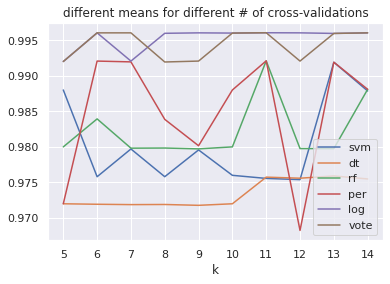

In [ ]:
x=[x for x in range(5,15)]
plt.plot(range(0,10), scoresvm, label="svm")
plt.plot(range(0,10), scoredt, label="dt")
plt.plot(range(0,10), scorerf, label="rf")
plt.plot(range(0,10), scoreper, label="per")
plt.plot(range(0,10), scorelog, label="log")
plt.plot(range(0,10), scorevote, label="vote")

plt.xticks(range(0, 10), x)
plt.title('different means for different # of cross-validations')
plt.xlabel('k')
plt.legend()
plt.show()

Here we can see the different means given by different K-cross-validations. We see that voting hard and logistic regression achieve the best values. However all classifiers predict pretty well overall and there is no definite best value of k.

In [ ]:
scoresvm=[]
scoredt=[]
scorerf=[]
scoreper=[]
scorelog=[]
scorevote=[]
for i in range(5,15):
  scoreslog = cross_val_score(logMSfit, XMS_reduced_pca, condMS, cv=i)
  scorelog.append(scoreslog.std())
  scoressvm = cross_val_score(svMSfit, XMS_reduced_pca, condMS, cv=i)
  scoresvm.append(scoressvm.std())
  scoresdt = cross_val_score(dtMSfit, XMS_reduced_pca, condMS, cv=i)
  scoredt.append(scoresdt.std())
  scoresrf = cross_val_score(rfMSfit, XMS_reduced_pca, condMS, cv=i)
  scorerf.append(scoresrf.std())
  scoresper = cross_val_score(perMSfit, XMS_reduced_pca, condMS, cv=i)
  scoreper.append(scoresper.std()) #runtime 9 min
  # scoresvote = cross_val_score(votingMSfit, XMS_reduced_pca, condMS, cv=i)
  # scorevote.append(scoresvote.std())


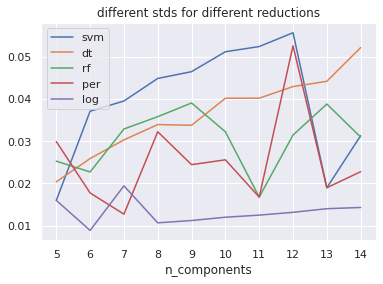

In [ ]:
plt.plot(range(0,10), scoresvm, label="svm")
plt.plot(range(0,10), scoredt, label="dt")
plt.plot(range(0,10), scorerf, label="rf")
plt.plot(range(0,10), scoreper, label="per")
plt.plot(range(0,10), scorelog, label="log")
plt.xticks(range(0, 10), [x for x in range(5,15)])
plt.title('different stds for different reductions')
plt.xlabel('n_components')
plt.legend()
plt.show()

We see that the standard deviation overall increases if we increase k (with the exception of k=13 for SVM and Perceptron).

Moreover it takes a longer time to perform higher k-cross validations. So in order to make computations a bit faster and keep our standard deviation low, we will default in general to k=10.



#### SmartSeq HCC1806

Same procedure as with SmartSeq MCF7, PCA also reduces to pretty low dimension (34) and we apply the same classifiers.

In [ ]:
df_meta_HS = pd.read_csv("drive/MyDrive/Lab/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta_HS))

Dataframe dimensions: (243, 8)


In [ ]:
df_HS = pd.read_csv( "drive/MyDrive/Lab/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt" , delimiter=" " , engine="python" , index_col=0)
print("Dataframe dimensions:", np.shape(df_HS))



Dataframe dimensions: (3000, 182)


In [ ]:
df_HST=np.transpose(df_HS)


In [ ]:
df_meta_HS.loc[df_meta_HS["Condition"]=="Hypo", "Condition"] = 1
df_meta_HS.loc[df_meta_HS["Condition"]=="Norm", "Condition"] = 0
index = df_HS.T.index
new = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    new[i] = not 'Norm' in index[i] # 1 Hypo 0 Norm
new = new.tolist()
df_label_H = pd.DataFrame(new, columns = ['Column_A'])
samples = df_HS.columns
df_label_H.index = samples
condHS = df_label_H.T.iloc[0]
condHS.shape

(182,)

In [ ]:
XHS_reduced_pca, pcaHS=pcafit(df_HST)
XHS_reduced_pca.shape

(182, 34)

Here is a small example for how many dimensions would remain if we add 0.04 to our explained variance ratio:

In [ ]:
XHS_reduced_example=pcafit(df_HST, 0.99)[0]
XHS_reduced_example.shape

(182, 89)

So 89-34=55 more!

##### Selecting parameters using GridSearchCV(basically repetition of SmartSeq MCF7)

SVM

In [ ]:
svHS=svm.SVC(random_state=42)
paramssvHS={
    "kernel" : ("linear", "poly", "rbf", "sigmoid"),
    "degree": [3, 4],
    # "gamma": ("scale", "auto"),
    "C": [1.0,2.0, 5.0, 10.0, 15.0],
}
svfitHS=GridSearchCV(svHS, paramssvHS)
svfitHS.fit(XHS_reduced_pca, condHS)
scoressvHS = cross_val_score(svfitHS, XHS_reduced_pca, condHS, cv=10)
scoressvHS

array([0.89473684, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88888889, 1.        ])

In [ ]:
svfitHS.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf'}

Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfHS=RandomForestClassifier(random_state=42)
paramsrfHS = {
    "n_estimators" : [10, 15, 20],
    "criterion" :("gini", "entropy"),
    "max_depth": [ 10, 15, 20],
    "min_samples_split" : [2, 5, 10],
    "max_features": ("sqrt", "log2")
    
}
rffitHS=clfd=GridSearchCV(rfHS, paramsrfHS)
rffitHS.fit(XHS_reduced_pca, condHS)
rfscoresHS = cross_val_score(rffitHS, XHS_reduced_pca, condHS, cv=10) #runtime 3m
rfscoresHS

array([0.89473684, 0.89473684, 1.        , 1.        , 0.83333333,
       0.88888889, 0.94444444, 0.94444444, 0.88888889, 1.        ])

In [ ]:
rffitHS.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 15}

Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perHS=Perceptron(random_state=42)
paramsperHS = {
    "penalty" : ("l2", "l1", "elasticnet", "None"),

    "alpha" :[0.0001, 0.001, 0.0001 ],
    "eta0": [0.5, 1, 2, 5],

}
perHSfit=GridSearchCV(perHS, paramsperHS)
perHSfit.fit(XHS_reduced_pca, condHS)
scoresperHS = cross_val_score(perHSfit, XHS_reduced_pca, condHS, cv=10)
scoresperHS

array([0.89473684, 0.84210526, 1.        , 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 1.        , 0.94444444, 1.        ])

In [ ]:
perHSfit.best_params_

{'alpha': 0.001, 'eta0': 2, 'penalty': 'l2'}

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logHS=LogisticRegression(random_state=42)
paramslogHS = {
    "C" : [0.5, 1, 2, 5, 10],

    "solver" :("newton-cg", "lbfgs", "liblinear"),
    "multi_class": ("auto", "ovr"),

}
logfitHS=GridSearchCV(logHS, paramslogHS)
logfitHS.fit(XHS_reduced_pca, condHS)
scoreslogHS = cross_val_score(logfitHS, XHS_reduced_pca,condHS, cv=10)
scoreslogHS

array([1.        , 0.94736842, 1.        , 1.        , 0.94444444,
       0.94444444, 1.        , 0.94444444, 0.94444444, 1.        ])

In [ ]:
logfitHS.best_params_

{'C': 10, 'multi_class': 'auto', 'solver': 'lbfgs'}

#####Voting Hard

In [ ]:
print("SVM :", scoressvHS.mean(), ", ", scoressvHS.std())
print("RF: ", rfscoresHS.mean(), ", ", rfscoresHS.std())
print("Per: ", scoresperHS.mean(), ", ", scoresperHS.std())
print("Log: ", scoreslogHS.mean(), ", ", scoreslogHS.std())

SVM : 0.9783625730994153 ,  0.043294605892116034
RF:  0.9289473684210527 ,  0.05506167050285551
Per:  0.9459064327485379 ,  0.047097811963994325
Log:  0.9725146198830409 ,  0.027497819755576032


In [ ]:
from sklearn.ensemble import VotingClassifier
# votingHS=VotingClassifier(estimators=[("sv", svfitHS), ("rf", rffitHS), ("lr",logfitHS)],voting="hard") #mean 0.9780 std 0.036 runtime 4 min
#votingHS=VotingClassifier(estimators=[("sv", svfitHS),("per", perHSfit), ("lr",logfitHS)],voting="hard") #mean 0.9725, std 0.02
votingHS=VotingClassifier(estimators=[("sv", svfitHS),("per", perHSfit), ("lr",logfitHS)],voting="hard")
votingHS.fit(XHS_reduced_pca, condHS)
scoresvoteHS = cross_val_score(votingHS, XHS_reduced_pca, condHS, cv=10)


#####Results of GridSearchCV:

In [ ]:
svfitHS.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf'}

In [ ]:
rffitHS.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 15}

In [ ]:
perHSfit.best_params_

{'alpha': 0.001, 'eta0': 2, 'penalty': 'l2'}

In [ ]:
logfitHS.best_params_

{'C': 10, 'multi_class': 'auto', 'solver': 'lbfgs'}

In [ ]:
svfitHS.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf'}

In [ ]:
print("SVM :", scoressvHS.mean(), ", ", scoressvHS.std())
print("RF: ", rfscoresHS.mean(), ", ", rfscoresHS.std())
print("Per: ", scoresperHS.mean(), ", ", scoresperHS.std())
print("Log: ", scoreslogHS.mean(), ", ", scoreslogHS.std())
print("Voting: ", scoresvoteHS.mean(), ", ", scoresvoteHS.std())

SVM : 0.9783625730994153 ,  0.043294605892116034
RF:  0.9289473684210527 ,  0.05506167050285551
Per:  0.9459064327485379 ,  0.047097811963994325
Log:  0.9725146198830409 ,  0.027497819755576032
Voting:  0.9836257309941521 ,  0.025023500462379743


Choose classifier with highest mean and lowest standard deviation:

In [ ]:
clfHS=votingHS

####DropSeq MCF7

##### New classifiers and their parameters

Now we encounter a problem: After doing normal PCA with explained variance ratio =0.95 our reduced dataset has a lot of dimensions and therefore training our classifiers takes a lot of time and memory (sometimes enough to crash the notebook), especially with GridSearchCV. 


So we took different classifiers, more suitable for high-dimensional fitting.

In [ ]:
df_MD = pd.read_csv( "drive/MyDrive/Lab/MCF7_Filtered_Normalised_3000_Data_train.txt" , delimiter=" " , engine="python" , index_col=0)


In [ ]:
df_MD.shape

(3000, 21626)

In [ ]:
#df_meta_H.loc[df_meta_H["Condition"]=="Hypo", "Condition"] = 1
#df_meta_H.loc[df_meta_H["Condition"]=="Norm", "Condition"] = 0
index = df_MD.T.index
new = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    new[i] = not 'Norm' in index[i] # 1 Hypo 0 Norm
new = new.tolist()
df_label_MD = pd.DataFrame(new, columns = ['Column_A'])
samples = df_MD.columns
df_label_MD.index = samples
condMD = df_label_MD.T.iloc[0]
condMD.shape

(21626,)

In [ ]:
df_MD_T = np.transpose(df_MD)


In [ ]:
XMD_reduced_pca, pcaMD=pcafit(df_MD_T,300) #runtime 22s


The reason why we reduce to 300 components will be explained in the next subsection.

In [ ]:
sum(pcaMD.explained_variance_ratio_)

0.8694485879990704

To add 0.1 to our explained vairance ratio (to get 0.95):

In [ ]:
XMD_reduced_example=pcafit(df_MD_T)[0]


In [ ]:
XMD_reduced_example.shape

(21626, 761)

In [ ]:
XMD_reduced_pca.shape

(21626, 300)

We need 361 more dimensions which is more than twice the dimensions we will be using.

######Stochastic Gradient Descent

Because we took a smaller explained variance ratio and therefore a smaller dimension, GridSearchCV works for some classifiers:

In [ ]:
sgdMD=SGDClassifier(random_state=42, max_iter=1000)
paramsMD={
    "loss": ("hinge", "log", "modified_huber", "squared_hinge", "perceptron"), #preferred log
    "alpha": [0.0001, 0.001, 0.002, 0.003], #preferred 0.002
    # "penalty": ("l1", "l2", "elasticnet") #preferred l2 always

}
sgdfitMD=GridSearchCV(sgdMD, paramsMD)
sgdfitMD.fit(XMD_reduced_pca, condMD) #runtime 31m

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


GridSearchCV(estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003],
                         'loss': ('hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron')})

In [ ]:
sgdfitMD.best_params_

{'alpha': 0.002, 'loss': 'log'}

In [ ]:
sgdclfMD=SGDClassifier(random_state=42, alpha=0.002, loss="log")
cv_resultssgdMD = cross_val_score(sgdclfMD, XMD_reduced_pca, condMD, cv=10)
cv_resultssgdMD.mean()

0.9790532515782419

######Passive Agressive

In [ ]:
paMD=PassiveAggressiveClassifier(random_state=42)
paramsMD={
    "C": [0.25, 0.5, 1.0, 2.0, 5.0]

}
pafitMD=GridSearchCV(paMD, paramsMD)
pafitMD.fit(XMD_reduced_pca, condMD)

GridSearchCV(estimator=PassiveAggressiveClassifier(random_state=42),
             param_grid={'C': [0.25, 0.5, 1.0, 2.0, 5.0]})

In [ ]:
pafitMD.best_params_

{'C': 0.25}

In [ ]:
paclfMD=PassiveAggressiveClassifier(random_state=42, C=1) #### try with C=1
cv_resultspaMD = cross_val_score(paclfMD, XMD_reduced_pca, condMD, cv=10)
print(cv_resultspaMD.mean())

0.9640725805244454


######Logistic Regression

In [ ]:
logMD=LogisticRegression(random_state=42, max_iter=1000)
paramsMD = {
    "C" : [0.1, 0.2 , 0.25 , 0.4 , 0.5, 1, 2, 5, 10],

    "solver" :("newton-cg", "liblinear"),
    # "multi_class": ("auto", "ovr"),

}
logfitMD=GridSearchCV(logMD, paramsMD)
logfitMD.fit(XMD_reduced_pca, condMD) #3min

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 0.2, 0.25, 0.4, 0.5, 1, 2, 5, 10],
                         'solver': ('newton-cg', 'liblinear')})

In [ ]:
logfitMD.best_params_

{'C': 0.25, 'solver': 'liblinear'}

In [ ]:
logclfMD=LogisticRegression(random_state=42, max_iter=1000, C=0.1, solver="newton-cg")
logclfMD.fit(XMD_reduced_pca, condMD)
cv_resultslogMD = cross_val_score(logclfMD, XMD_reduced_pca, condMD, cv=10)
print(cv_resultslogMD.mean())

0.9797468611579063


######Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perMD=Perceptron(random_state=42)
paramsperMD = {
    # "penalty" : ("l2", "l1", "elasticnet", "None"),

    # "alpha" :[0.0001, 0.001, 0.0001 ],                #all dont matter
    #  "eta0": [0.5, 1, 2, 5],

}
perfitMD=GridSearchCV(perMD, paramsperMD)
perfitMD.fit(XMD_reduced_pca, condMD)


GridSearchCV(estimator=Perceptron(random_state=42), param_grid={})

Note that the parameters for GridSearchCV somehow don't change the result of the mean fit.

In [ ]:
perfitMD.best_params_

{}

In [ ]:
perclfMD=Perceptron(random_state=42)

cv_resultsperMD = cross_val_score(perclfMD, XMD_reduced_pca, condMD, cv=10)
cv_resultsperMD

array([0.9690245 , 0.97457235, 0.97179843, 0.96625058, 0.97179843,
       0.97364771, 0.9787234 , 0.96762257, 0.97132285, 0.97641073])

######Voting Hard

In [ ]:

print("SGD :", cv_resultssgdMD.mean(), ", ", cv_resultssgdMD.std())
print("PA: ", cv_resultspaMD.mean(), ", ", cv_resultspaMD.std())
print("Per; ", cv_resultsperMD.mean(), ", ", cv_resultsperMD.std())
print("Log: ", cv_resultslogMD.mean(), ", ", cv_resultslogMD.std())
#print("Voting: ", cv_results6.mean())

SGD : 0.9790532515782419 ,  0.003065891372947297
PA:  0.9640725805244454 ,  0.012986473605745336
Per;  0.972117155781598 ,  0.003680550523831884
Log:  0.9797468611579063 ,  0.003153702642916969


In [ ]:
from sklearn.ensemble import VotingClassifier
#votingHD=VotingClassifier(estimators=[("svHD", svHD), ("rffitHD", rffitHD), ("logHD",logHD), ("perfitHD", perfitHD), ("dtfitHD", dtfitHD)],voting="hard")
#votingMD=VotingClassifier(estimators=[("sgd", sgdtest), ("pa", testclf2), ("logHD",testclf3), ("per", testclf4)],voting="hard")
votingMD=VotingClassifier(estimators=[("sgd", sgdclfMD), ("logHD",logclfMD), ("per", perclfMD )],voting="hard") #9792
# votingHD=VotingClassifier(estimators=[("sgd", sgdtest), ("per", testclf4)],voting="hard")
#votingMD=VotingClassifier(estimators=[("sgd", sgdtest),  ("logHD",testclf3)],voting="hard") 0.9790
votingMD.fit(XMD_reduced_pca, condMD)


VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.002, loss='log',
                                            random_state=42)),
                             ('logHD',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('per', Perceptron(eta0=0.5, random_state=42))])

In [ ]:
cv_resultsvoteMD = cross_val_score(votingMD, XMD_reduced_pca, condMD, cv=10)
cv_resultsvoteMD

array([0.97503467, 0.97873324, 0.98104485, 0.97688396, 0.97642164,
       0.98243181, 0.98473636, 0.9787234 , 0.97826087, 0.98149861])

In [ ]:
cv_resultsvoteMD.mean()

0.9793769403255406

In [ ]:
cv_resultsvoteMD.std()

0.002850089008355768

We again choose our classifier (log or voting almost make no difference, but log is faster):

In [ ]:
clfMD=logclfMD

#####A note on dimension of PCA

We tried to show the different means of the classifiers using different # of components and explained variance ratios respectively. Obviously these means might not be perfect, since we already used GridSearchCV on a fixed set which is a huge assumption that it should be the same for every reduced set. However otherwise it was computationally impossible with our availible hardware resources (not enough memory) and is here to give an idea.

In [ ]:
def meanscorecross(clf, dataset, testset, k=10):
  cv_results = cross_val_score(clf, dataset, testset, cv=k)
  return cv_results.mean()


In [ ]:
l1=[x for x in range(100,301,10)]
s=[]
pa=[]
lr=[]
per=[]
vote=[]  
sgdtest2=SGDClassifier(random_state=42, alpha=0.0001)
testclf2=PassiveAggressiveClassifier(random_state=42, C=0.25)
testclf3=LogisticRegression(random_state=42, max_iter=1000, C=0.1, solver="newton-cg")
testclf4=Perceptron(random_state=42, eta0=0.5)
votingMD=VotingClassifier(estimators=[("sgd", sgdclfMD), ("logHD",logclfMD), ("per", perclfMD)],voting="hard")
for i in range(100,301, 10):
  XMD_reduced_pca2=pcafit(df_MD_T, i)[0]
  s.append(meanscorecross(sgdclfMD, XMD_reduced_pca2, condMD))
  pa.append(meanscorecross(paclfMD, XMD_reduced_pca2, condMD))
  lr.append(meanscorecross(logclfMD, XMD_reduced_pca2, condMD))
  per.append(meanscorecross(perclfMD, XMD_reduced_pca2, condMD))
  vote.append(meanscorecross(votingMD, XMD_reduced_pca2, condMD)) #runtime 21m fail, real runtime

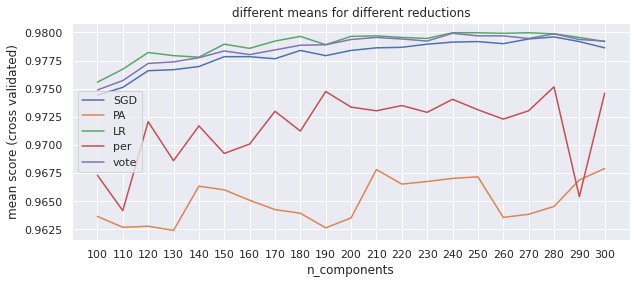

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,21), s, label="SGD")
plt.plot(range(0,21), pa, label="PA")
plt.plot(range(0,21), lr, label="LR")
plt.plot(range(0,21), per, label="per")
plt.plot(range(0,21), vote, label="vote")
plt.xticks(range(0,21), l1)
plt.title('different means for different reductions')
plt.xlabel('n_components')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

And with ratio:

In [ ]:
l2=[x/20 for x in range(10,20, 1)]
s=[]
pa=[]
lr=[]
per=[]
vote=[]  
# sgdtest2=SGDClassifier(random_state=42, alpha=0.0001)
# testclf2=PassiveAggressiveClassifier(random_state=42, C=0.25)
# testclf3=LogisticRegression(random_state=42, max_iter=1000, C=0.1, solver="newton-cg")
# testclf4=Perceptron(random_state=42, eta0=0.5)
votingMD=VotingClassifier(estimators=[("sgd", sgdclfMD), ("logHD",logclfMD), ("per", perclfMD)],voting="hard")
for i in range(10,20, 1):
  XMD_reduced_pca2=pcafit(df_MD_T, i/20)[0]
  s.append(meanscorecross(sgdclfMD, XMD_reduced_pca2, condMD))
  pa.append(meanscorecross(paclfMD, XMD_reduced_pca2, condMD))
  lr.append(meanscorecross(logclfMD, XMD_reduced_pca2, condMD))
  per.append(meanscorecross(perclfMD, XMD_reduced_pca2, condMD))
  vote.append(meanscorecross(votingMD, XMD_reduced_pca2, condMD)) #runtime 18m

In [ ]:
plt.plot(range(0,10), s, label="SGD")
plt.plot(range(0,10), pa, label="PA")
plt.plot(range(0,10), lr, label="LR")
plt.plot(range(0,10), per, label="per")
plt.plot(range(0,10), vote, label="vote")
plt.xticks(range(0,10), l2)
plt.title('different means for different reductions')
plt.xlabel('explained variance ratio')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

We see that using an explained variance ratio for PCA of about 0.85 is enough for majority of our classifiers to converge. We are taking that value, because it allows for faster computations (especially useful for GridSearchCV used before).


PCA with 300 components gives us our wanted ratio.

In [ ]:

sum(pcaMD.explained_variance_ratio_)

0.8694485879990704

#### DropSeq HCC1806

In [ ]:
df_HD = pd.read_csv( "drive/MyDrive/Lab/HCC1806_Filtered_Normalised_3000_Data_train.txt" , delimiter=" " , engine="python" , index_col=0)


In [ ]:
df_HD_T = np.transpose(df_HD)


In [ ]:
def meanscorecross(clf, dataset, testset, k=10):
  cv_results = cross_val_score(clf, dataset, testset, cv=k)
  return cv_results.mean()

In [ ]:

index = df_HD.T.index
new = np.zeros((len(index)),dtype = 'int64')
for i in range(len(index)):
    new[i] = not 'Norm' in index[i] # 1 Hypo 0 Norm
new = new.tolist()
df_label_HD = pd.DataFrame(new, columns = ['Column_A'])
samples = df_HD.columns
df_label_HD.index = samples
condHD = df_label_HD.T.iloc[0]
condHD.shape

(14682,)

In [ ]:
XHD_reduced_pca, pcaHD=pcafit(df_HD_T,0.9)


In [ ]:
XHD_reduced_pca.shape

(14682, 471)

#####Choosing parameters using GridSearchCV (again highly repetitive)

Stochastic Gradient Descent:

In [ ]:
sgdHD=SGDClassifier(random_state=42, max_iter=1000)
paramsHD={
    "loss": ("hinge", "log", "modified_huber"),##, "squared_hinge", "perceptron"),
    "alpha": [0.0001, 0.001, 0.002, 0.003], #removed 0.00001,

}
sgdfitHD=GridSearchCV(sgdHD, paramsHD)
sgdfitHD.fit(XHD_reduced_pca, condHD)

GridSearchCV(estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003],
                         'loss': ('hinge', 'log', 'modified_huber')})

In [ ]:
sgdfitHD.best_params_

{'alpha': 0.001, 'loss': 'log'}

In [ ]:
sgdclfHD=SGDClassifier(random_state=42, alpha=0.001, loss="log")
cv_resultssgdHD = cross_val_score(sgdclfHD, XHD_reduced_pca, condHD, cv=10)
cv_resultssgdHD.mean()

0.9552498223967444

Passive Agressive:

In [ ]:
paHD=PassiveAggressiveClassifier(random_state=42)
paramsHD={
    "C": [0.25, 0.5, 1.0, 2.0, 5.0]

}
pafitHD=GridSearchCV(paHD, paramsHD)
pafitHD.fit(XHD_reduced_pca, condHD)

GridSearchCV(estimator=PassiveAggressiveClassifier(random_state=42),
             param_grid={'C': [0.25, 0.5, 1.0, 2.0, 5.0]})

In [ ]:
pafitHD.best_params_

{'C': 0.25}

In [ ]:
paclfHD=PassiveAggressiveClassifier(random_state=42, C=0.25) #### try with C=1
cv_resultspaHD = cross_val_score(paclfHD, XHD_reduced_pca, condHD, cv=10)
print(cv_resultspaHD.mean())

0.9367238088525252


Logistic Regression:

In [ ]:
logHD=LogisticRegression(random_state=42, max_iter=1000)
paramslogHD = {
    "C" : [0.1, 0.2 , 0.25 , 0.4 , 0.5, 1, 2, 5, 10],

    "solver" :("newton-cg", "liblinear"),

}
logfitHD=GridSearchCV(logHD, paramslogHD)
logfitHD.fit(XHD_reduced_pca, condHD) #5min

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 0.2, 0.25, 0.4, 0.5, 1, 2, 5, 10],
                         'solver': ('newton-cg', 'liblinear')})

In [ ]:
logfitHD.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [ ]:
logclfHD=LogisticRegression(random_state=42, max_iter=1000, C=0.1, solver="newton-cg")
logclfHD.fit(XHD_reduced_pca, condHD)
cv_resultslogHD = cross_val_score(logclfHD, XHD_reduced_pca, condHD, cv=10)
print(cv_resultslogHD.mean())

0.9559311604216478


Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perHD=Perceptron(random_state=42)
paramsperHD = {
    "penalty" : ("l2", "l1", "elasticnet", "None"),

    "alpha" :[0.0001, 0.001, 0.0001 ], #all dont matter
     "eta0": [0.5, 1, 2, 5],

}
perfitHD=GridSearchCV(perHD, paramsperHD)
perfitHD.fit(XHD_reduced_pca, condHD)


GridSearchCV(estimator=Perceptron(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.0001],
                         'eta0': [0.5, 1, 2, 5],
                         'penalty': ('l2', 'l1', 'elasticnet', 'None')})

In [ ]:
perfitHD.best_params_

{'alpha': 0.0001, 'eta0': 0.5, 'penalty': 'None'}

In [ ]:
perclfHD=Perceptron(random_state=42, eta0=0.5) #TRY with penalty

cv_resultsperHD = cross_val_score(perclfHD, XHD_reduced_pca, condHD, cv=10)
cv_resultsperHD

array([0.95507148, 0.94281824, 0.91961853, 0.92915531, 0.9352861 ,
       0.94414169, 0.93188011, 0.94073569, 0.9393733 , 0.95095368])

##### Results of GridSearchCV and Voting Hard

In [ ]:
sgdfitHD.best_params_

{'alpha': 0.001, 'loss': 'log'}

In [ ]:
pafitHD.best_params_

{'C': 0.25}

In [ ]:
logfitHD.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [ ]:
perfitHD.best_params_

{'alpha': 0.0001, 'eta0': 0.5, 'penalty': 'None'}

In [ ]:
print("SGD :", cv_resultssgdHD.mean(), ", ", cv_resultssgdHD.std())
print("PA: ", cv_resultspaHD.mean(), ", ", cv_resultspaHD.std())
print("Per; ",cv_resultsperHD.mean(), ", ", cv_resultsperHD.std())
print("Log: ", cv_resultslogHD.mean(), ", ", cv_resultslogHD.std())

SGD : 0.9552498223967444 ,  0.010487373040919339
PA:  0.9367238088525252 ,  0.012486200047417307
Per;  0.9389034135067508 ,  0.00991111811985977
Log:  0.9559311604216478 ,  0.010894464161052182


In [ ]:
from sklearn.ensemble import VotingClassifier
#votingHD=VotingClassifier(estimators=[("svHD", svHD), ("rffitHD", rffitHD), ("logHD",logHD), ("perfitHD", perfitHD), ("dtfitHD", dtfitHD)],voting="hard")
# votingHD=VotingClassifier(estimators=[("sgd", sgdtest), ("pa", testclf2), ("logHD",testclf3), ("per", testclf4)],voting="hard")
votingHD=VotingClassifier(estimators=[("sgd", sgdclfHD), ("logHD",logclfHD), ("per", perclfHD)],voting="hard") #this gives best result
# votingHD=VotingClassifier(estimators=[("sgd", sgdtest), ("per", testclf4)],voting="hard")
# votingHD=VotingClassifier(estimators=[("sgd", sgdtest),  ("logHD",testclf3)],voting="hard")
votingHD.fit(XHD_reduced_pca, condHD)


VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.001, loss='log',
                                            random_state=42)),
                             ('logHD',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('per', Perceptron(eta0=0.5, random_state=42))])

In [ ]:
cv_resultsvoteHD = cross_val_score(votingHD, XHD_reduced_pca, condHD, cv=10)
cv_resultsvoteHD

array([0.97072839, 0.96119809, 0.94754768, 0.95231608, 0.9366485 ,
       0.95435967, 0.95163488, 0.95231608, 0.96457766, 0.97002725])

In [ ]:

print("Voting: ", cv_resultsvoteHD.mean(),  ", ", cv_resultsvoteHD.std())

Voting:  0.9561354273514577 ,  0.010044459816800752


Choose Classifier  (again we could also choose log here):

In [ ]:
clfHD=votingHD

#####On PCA of Dropseq HCC:

In [ ]:
sHD=[]
paHD=[]
lrHD=[]
perHD=[]
voteHD=[]  
votingHD=VotingClassifier(estimators=[("sgd", sgdclfHD), ("logHD",logclfHD), ("per", perclfHD)],voting="hard")
for i in range(10,20, 1):
  XHD_reduced_pca2=pcafit(df_HD_T, i/20)[0]
  sHD.append(meanscorecross(sgdclfHD, XHD_reduced_pca2, condHD))
  paHD.append(meanscorecross(paclfHD, XHD_reduced_pca2, condHD))
  lrHD.append(meanscorecross(logclfHD, XHD_reduced_pca2, condHD))
  perHD.append(meanscorecross(perclfHD, XHD_reduced_pca2, condHD))
  voteHD.append(meanscorecross(votingHD, XHD_reduced_pca2, condHD)) #runtime 14min

In [ ]:
l=[x/20 for x in range(10,20, 1)]

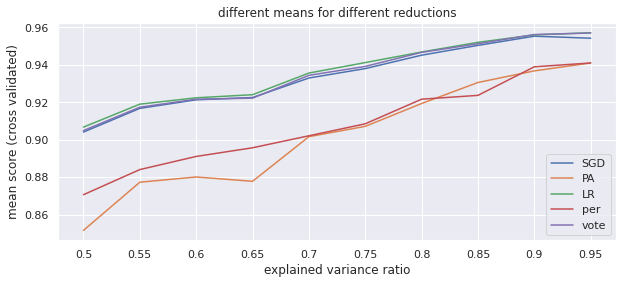

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,10), sHD, label="SGD")
plt.plot(range(0,10), paHD, label="PA")
plt.plot(range(0,10), lrHD, label="LR")
plt.plot(range(0,10), perHD, label="per")
plt.plot(range(0,10), voteHD, label="vote")
plt.xticks(range(0,10), l)
plt.title('different means for different reductions')
plt.xlabel('explained variance ratio')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

This time we need a ratio of about 0.9 to converge, which is exactly what we picked in the beginning.

### Making predictions:

The following part is the same for every dataset: Load it in, transform it using the used PCA and then predict using the appropiate classifier. I will demonstrate it by predicting the unseen data we were given.

In [ ]:
df_HStest = pd.read_csv( "drive/MyDrive/Lab/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt" , delimiter=" " , engine="python" , index_col=0) #dataset we want to predict


In [ ]:
df_HStest=df_HStest.to_numpy()


In [ ]:
df_HStest.shape

(3000, 45)

In [ ]:
XHS_reduced_test=pcaHS.transform(df_HStest.transpose())
XHS_reduced_test.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


(45, 34)

In [ ]:
predHS=clfHS.predict(XHS_reduced_test) ##

In [ ]:
predHS #0==N, 1==H

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

The following was to write the file and can be ignored.

In [ ]:
# the following was used to write our predictions we had to send in a file
# f=open("drive/MyDrive/Lab/Dropseq_HCC1806_prediction.txt", 'w')
# for i in range(len(predHS)):
#   if predHS[i]==0:
#     f.write("N, ")
#   elif predHS[i]==1:
#     f.write("H, ")
#f.close()



### Features

In [ ]:
pcapf=[pcaMS, pcaHS, pcaMD, pcaHD]

In [ ]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

In [ ]:
def returnfeatures(dataset, origindata,  target, percentile,  n):
  bestfeatures=SelectPercentile(percentile=percentile)
  fit=bestfeatures.fit(dataset,target)
  dfscores = pd.DataFrame(fit.scores_)
  dfscores=dfscores.nlargest(n, dfscores.columns[0])
  return [origindata.transpose().columns[i] for i in range(len(dfscores))]

#### Features with whole dataset

Since we were interested how feature selection would perform, we tried plotting a given percentile (ranging from 0.05 to 0.4) of best features and the means the classifiers get.

#####SmartSeq HCC1806

In [ ]:
XHSfeat=pd.read_csv( "drive/MyDrive/Lab/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt" , delimiter=" " , engine="python" , index_col=0)

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2, mutual_info_classif

In [ ]:

sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
votingf=VotingClassifier(estimators=[("svm", svfitHS), ("log",logfitHS), ("per", perHSfit), ("rf", rffitHS)],voting="hard")
svfitHSf=svm.SVC(C=2,random_state=42)
rffitHSf=RandomForestClassifier(criterion= 'entropy',max_depth= 15,max_features= 'sqrt',min_samples_split= 5,n_estimators= 15,random_state=42)
logfitHSf=LogisticRegression(C= 10, multi_class= 'auto', solver= 'lbfgs',random_state=42, max_iter=10000)
perHSfitf=Perceptron(random_state=42)
for i in range(1,9, 1):
  selector=SelectPercentile(percentile=i/20)
  fit=selector.fit(XHSfeat.transpose(),condHS)
  X_reduced_feat=fit.transform(XHSfeat.transpose())
  sf.append(meanscorecross(svfitHSf, X_reduced_feat, condHS))
  rff.append(meanscorecross(rffitHSf, X_reduced_feat, condHS))
  lrf.append(meanscorecross(logfitHSf, X_reduced_feat, condHS))
  perf.append(meanscorecross(perHSfitf, X_reduced_feat, condHS))

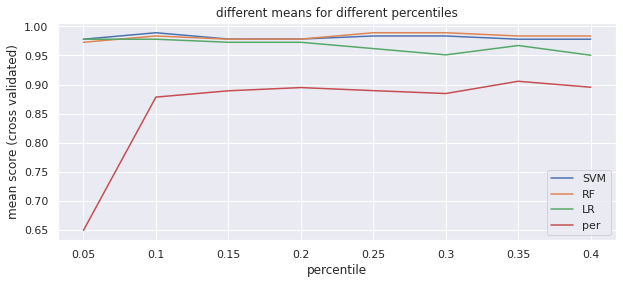

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

We see that SVM, Logistic Regression and the Random Forest Classifier perform really good (accuracy of around 0.975) even when choosing a small percentile and they all stay in that range when choosing higher percentiles.

The perceptron is also with a best 0.4 Percentile comparatively very weak to the remaining classifiers(0.90 vs 0.975).

We can also quickly verify that these really are the same values:

In [ ]:
selector=SelectPercentile(percentile=0.10)
fit=selector.fit(XHSfeat.transpose(),condHS)
X_reduced_feat=fit.transform(XHSfeat.transpose())
meanscorecross(svfitHSf, X_reduced_feat, condHS)

0.9888888888888889

In [ ]:
sf[1]

0.9888888888888889

Next we look also at another function of SelectPercentile called mutual_info_class:

In [ ]:

sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
svfitHSf=svm.SVC(C=2,random_state=42)
rffitHSf=RandomForestClassifier(criterion= 'entropy',max_depth= 15,max_features= 'sqrt',min_samples_split= 5,n_estimators= 15,random_state=42)
logfitHSf=LogisticRegression(C= 10, multi_class= 'auto', solver= 'lbfgs',random_state=42, max_iter=10000)
perHSfitf=Perceptron(random_state=42)
for i in range(1,9, 1):
  selector=SelectPercentile(mutual_info_classif, percentile=i/20)
  fit=selector.fit(XHSfeat.transpose(),condHS)
  X_reduced_feat=fit.transform(XHSfeat.transpose())
  sf.append(meanscorecross(svfitHSf, X_reduced_feat, condHS))
  rff.append(meanscorecross(rffitHSf, X_reduced_feat, condHS))
  lrf.append(meanscorecross(logfitHSf, X_reduced_feat, condHS))
  perf.append(meanscorecross(perHSfitf, X_reduced_feat, condHS))

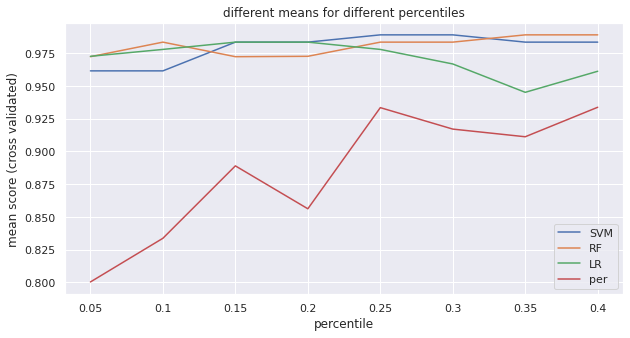

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

Here we get the close to the same results of the above plot.

The only thing different is that the Perceptron classifier predicts way better with smaller percentiles (0.800 vs 0.65 at 0.05 percentile) and also reaches a higher value at 0.4 (0.93 vs 0.9).

#####Repetition of code for all datasets

In [ ]:

sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
svfitHSf=svm.SVC(C=10,random_state=42, kernel="sigmoid")
rffitHSf=RandomForestClassifier(criterion= 'gini',max_depth=1, max_features="sqrt", min_samples_split=2, n_estimators=1,random_state=42)
logfitHSf=LogisticRegression(C= 0.5, multi_class= 'auto', solver= 'liblinear',random_state=42, max_iter=10000)
perHSfitf=Perceptron(random_state=42)
for i in range(1,9, 1):
  selector=SelectPercentile(percentile=i/20)
  fit=selector.fit(df_MST,condMS)
  X_reduced_feat=fit.transform(df_MST)
  sf.append(meanscorecross(svfitHSf, X_reduced_feat, condMS))
  rff.append(meanscorecross(rffitHSf, X_reduced_feat, condMS))
  lrf.append(meanscorecross(logfitHSf, X_reduced_feat, condMS))
  perf.append(meanscorecross(perHSfitf, X_reduced_feat, condMS))

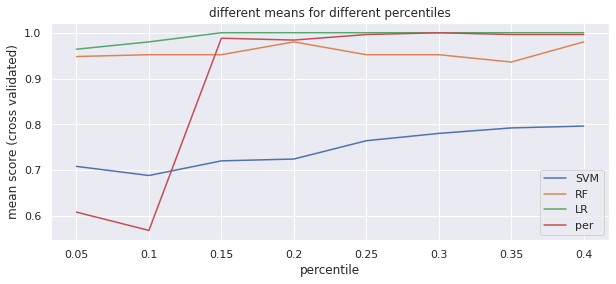

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2, mutual_info_classif
sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
svfitHSf=svm.SVC(C=10,random_state=42, kernel="sigmoid")
rffitHSf=RandomForestClassifier(criterion= 'gini',max_depth=1, max_features="sqrt", min_samples_split=2, n_estimators=1,random_state=42)
logfitHSf=LogisticRegression(C= 0.5, multi_class= 'auto', solver= 'liblinear',random_state=42, max_iter=10000)
perHSfitf=Perceptron(random_state=42)
for i in range(1,9, 1):
  selector=SelectPercentile(mutual_info_classif, percentile=i/20)
  fit=selector.fit(df_MST,condMS)
  X_reduced_feat=fit.transform(df_MST)
  sf.append(meanscorecross(svfitHSf, X_reduced_feat, condMS))
  rff.append(meanscorecross(rffitHSf, X_reduced_feat, condMS))
  lrf.append(meanscorecross(logfitHSf, X_reduced_feat, condMS))
  perf.append(meanscorecross(perHSfitf, X_reduced_feat, condMS))

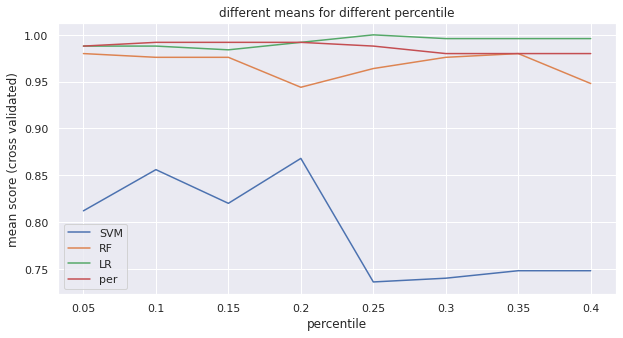

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
#plt.plot(range(0,8), votef, label="vote")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentile')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

In [ ]:
###DropSeq MCF7

In [ ]:

sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
for i in range(1,13, 1):
  selector=SelectPercentile(percentile=i/20)
  fit=selector.fit(df_MD_T,condMD)
  X_reduced_feat=fit.transform(df_MD_T)
  sf.append(meanscorecross(sgdclfMD, X_reduced_feat, condMD))
  rff.append(meanscorecross(paclfMD, X_reduced_feat, condMD))
  lrf.append(meanscorecross(logclfMD, X_reduced_feat, condMD))
  perf.append(meanscorecross(perclfMD, X_reduced_feat, condMD))


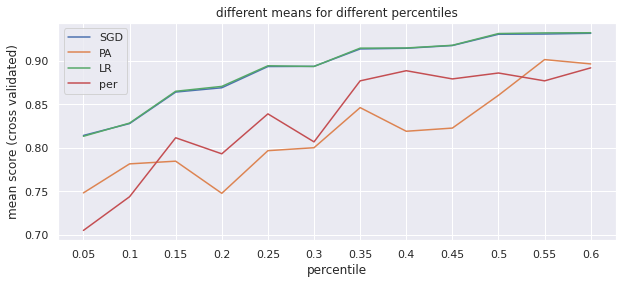

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,12), sf, label="SGD")
plt.plot(range(0,12), rff, label="PA")
plt.plot(range(0,12), lrf, label="LR")
plt.plot(range(0,12), perf, label="per")
plt.xticks(range(0,12), [x/20 for x in range(1,13)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

In [ ]:
####DropSeq HCC1806

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
sf=[]
rff=[]
lrf=[]
perf=[]
votef=[]  
for i in range(1,13, 1):
  selector=SelectPercentile(percentile=i/20)
  fit=selector.fit(df_HD_T,condHD)
  X_reduced_feat=fit.transform(df_HD_T)
  sf.append(meanscorecross(sgdclfHD, X_reduced_feat, condHD))
  rff.append(meanscorecross(paclfHD, X_reduced_feat, condHD))
  lrf.append(meanscorecross(logclfHD, X_reduced_feat, condHD))
  perf.append(meanscorecross(perclfHD, X_reduced_feat, condHD))
  #votef.append(meanscorecross(votingf, X_reduced_feat, condHS))

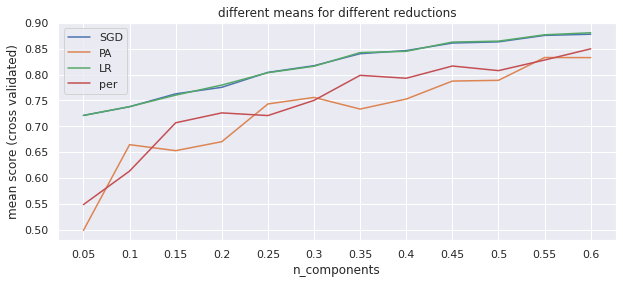

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,12), sf, label="SGD")
plt.plot(range(0,12), rff, label="PA")
plt.plot(range(0,12), lrf, label="LR")
plt.plot(range(0,12), perf, label="per")
#plt.plot(range(0,12), votef, label="vote")
plt.xticks(range(0,12), [x/20 for x in range(1,13)])
plt.title('different means for different reductions')
plt.xlabel('n_components')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

##### SmartSeq MCF7

With f_classif (standard score function):


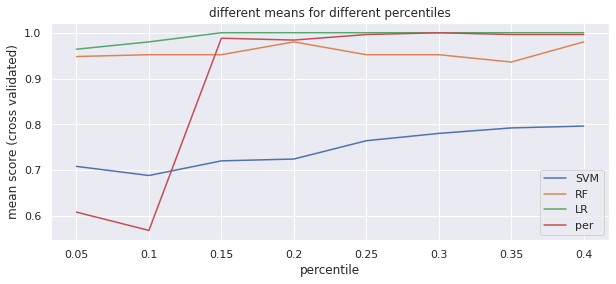

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

A bigger percentile leads to a higher mean for the classifiers, which is what we would guess. We notice that perceptron gets way better after choosing the 0.15 percentile and is converging to be as good as LR which in this plot is our best classifier.

With mutual info:

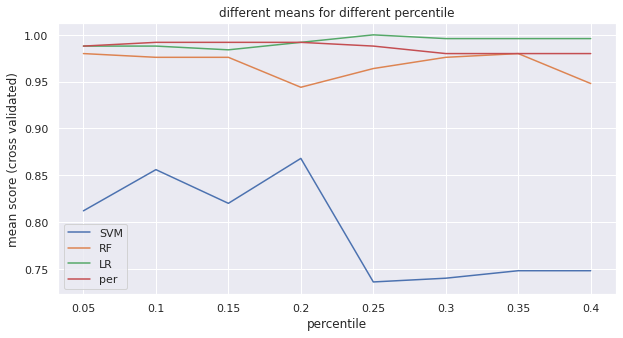

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(0,8), sf, label="SVM")
plt.plot(range(0,8), rff, label="RF")
plt.plot(range(0,8), lrf, label="LR")
plt.plot(range(0,8), perf, label="per")
plt.xticks(range(0,8), [x/20 for x in range(1,9)])
plt.title('different means for different percentile')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

It seems that while all classifiers are right from the start between 0.95 and 1, this is not the case for SVM. This time the Perceptron beats Logistic Regression at the start, but LR wins out for larger percentiles.

##### DropSeq MCF7

We are using only f_clasif here since mutual_info did take up too much memory:

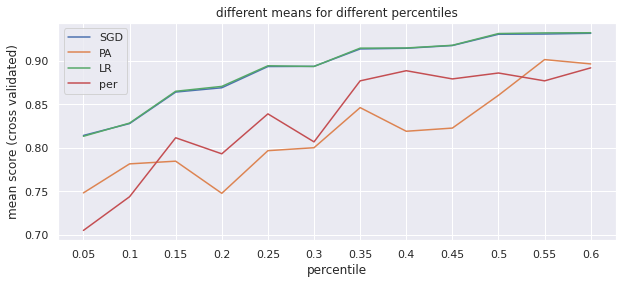

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,12), sf, label="SGD")
plt.plot(range(0,12), rff, label="PA")
plt.plot(range(0,12), lrf, label="LR")
plt.plot(range(0,12), perf, label="per")
plt.xticks(range(0,12), [x/20 for x in range(1,13)])
plt.title('different means for different percentiles')
plt.xlabel('percentile')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

Again a higher percentile leads to a higher mean for all classifiers. We can also see that SGD and Logistic Regression perform way better than the others (around 0.05 bigger for all percentiles).

##### DropSeq HCC1806

Again using only the score function f_classif:

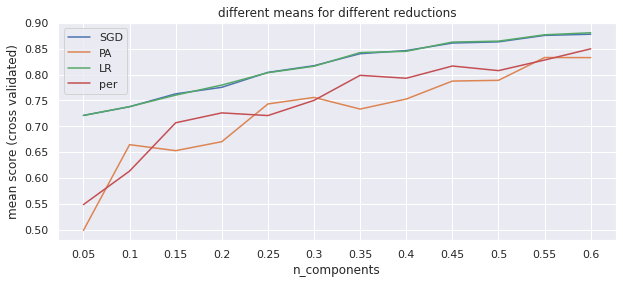

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(range(0,12), sf, label="SGD")
plt.plot(range(0,12), rff, label="PA")
plt.plot(range(0,12), lrf, label="LR")
plt.plot(range(0,12), perf, label="per")
plt.xticks(range(0,12), [x/20 for x in range(1,13)])
plt.title('different means for different reductions')
plt.xlabel('n_components')
plt.ylabel('mean score (cross validated)')
plt.legend()
plt.show()

We again note that SGD and LR outperform the others. This was true now in both cases of Dropseq.

#### Feature Retention

Next we were interested in seeing if features were different if extracted them from the sets reduced by PCA or extract them from the whole dataset.

In [ ]:
def returnfeatures(dataset, origindata,  target, percentile,  n):
  bestfeatures=SelectPercentile(percentile=percentile)
  fit=bestfeatures.fit(dataset,target)
  dfscores = pd.DataFrame(fit.scores_)
  dfscores=dfscores.nlargest(n, dfscores.columns[0])
  return [origindata.transpose().columns[i] for i in range(len(dfscores))]

We will default to the best 0.15 Percentile and n=100 features.

In [ ]:
reducedset=[XMS_reduced_pca, XHS_reduced_pca, XMD_reduced_pca, XHD_reduced_pca]
cond=[condMS, condHS, condMD, condHD]
datasets=[df_MS, df_HS, df_MD, df_HD]
f=np.zeros((4,2))
o=np.zeros((4,2))
complist=[]
for i in range(4):
  leng= returnfeatures(reducedset[i], datasets[i], cond[i], 0.15, 100 )
  complist.append(leng)
  same=0
  order=0
  leng2= returnfeatures(datasets[i].transpose(), datasets[i], cond[i], 0.15, 100 )

  for k in range(len(leng)):
      if leng[k] in leng2:
       same+=1
      if leng[k] == leng2[k]:
        order+=1
  f[i][0]=same/len(leng)
  f[i][1]=len(leng)
  o[i][0]=order/len(leng)
  o[i][1]=len(leng)

In [ ]:
f #general

array([[  1.,  20.],
       [  1.,  34.],
       [  1., 100.],
       [  1., 100.]])

In [ ]:
o #in order

array([[  1.,  20.],
       [  1.,  34.],
       [  1., 100.],
       [  1., 100.]])

We see that not only are the extracted features the same, they also remain in the same order.

#### Feature Comparison

Lastly we wanted to see how many features that were extracted from Select 0.15 Best Percentile of the reduced sets could be found in other reduced sets.

In [ ]:


comp=np.zeros((4,5))

In [ ]:
for i in range(4):
  for j in range(4):
    compf=0
    for k in range(len(complist[i])):

      if complist[i][k] in complist[j]:
        compf+=1
    comp[i][j]=compf/len(complist[i])
    comp[i][j]=len(complist[i]) ##remember 100 was the nlargest value we searched for before
    comp[i][j+1]=len(complist[i]) 



In [ ]:
comp

array([[ 20.,  20.,  20.,  20.,  20.],
       [ 34.,  34.,  34.,  34.,  34.],
       [100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100.]])

In [ ]:
Xstr=["XMS", "XHS", "XMD", "XHD"]
df = pd.DataFrame(comp,columns=Xstr+["dim"], index=Xstr)
df

XMS    XHS    XMD    XHD    dim
XMS   20.0   20.0   20.0   20.0   20.0
XHS   34.0   34.0   34.0   34.0   34.0
XMD  100.0  100.0  100.0  100.0  100.0
XHD  100.0  100.0  100.0  100.0  100.0

This is not symmetric, since the last row shows to how many features we are comparing. On the diagonal we get the same array that we got for order (or general, since they are the same).

### Building a general predictor

To build a general predictor we chose to look at both hard voting and soft voting:

In [ ]:
clfHS2=svfitHS

In [ ]:
votinggeneral=VotingClassifier(estimators=[("MS", clfMS), ("HS",clfHS2), ("MD", clfMD), ("HD", clfHD)],voting="hard")

In [ ]:
svfitHS.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'rbf'}

In [ ]:
clfHSprob= svm.SVC(C=2, degree=3, kernel="rbf", probability=True)

In [ ]:
votinggeneral2=VotingClassifier(estimators=[("MS", clfMS), ("HS",clfHSprob), ("MD", clfMD), ("HD", clfHD)],voting="soft")

Note: It would also be possible to do voting on all subsets of classifiers, sadly this again took too much memory and could not be computed on our machines.

#### Hard voting

The next cell takes a runtime of >1h, because it has problems since len(reducedset[i]) > the features of the estimators. 

In [ ]:
pcag=[pcaMS, pcaHS, pcaMD, pcaHD]
reducedset=[XMS_reduced_pca, XHS_reduced_pca, XMD_reduced_pca, XHD_reduced_pca] #using clfHS takes a long time produces many error due to failed convergence
cond=[condMS, condHS, condMD, condHD]
datasets=[df_MS, df_HS, df_MD, df_HD]
g=np.zeros((4,4))
for i in range(len(reducedset)):
  votinggeneral.fit(reducedset[i], cond[i])
  for j in range(len(datasets)):
    error=0
    Xtest=pcag[i].transform(datasets[j].transpose())
    pred=votinggeneral.predict(Xtest)
    for k in range(len(pred)):
      if pred[k]!=cond[j][k]:
        error+=1
    g[i][j]=1-error/len(pred)

We try to modify the predictor:

In [ ]:
votinggeneralmod=VotingClassifier(estimators=[ ("MD", clfMD), ("HD", clfHD)],voting="hard")

In [ ]:
pcag=[pcaMS, pcaHS, pcaMD, pcaHD]
reducedset=[XMS_reduced_pca, XHS_reduced_pca, XMD_reduced_pca, XHD_reduced_pca] #using clfHS takes a long time produces many error due to failed convergence
cond=[condMS, condHS, condMD, condHD]
datasets=[df_MS, df_HS, df_MD, df_HD]
g=np.zeros((4,4))
for i in range(len(reducedset)):
      
      for j in range(len(datasets)):
        error=0
        Xtest=pcag[i].transform(datasets[j].transpose())
        if i <2:

            votinggeneral.fit(reducedset[i], cond[i])
            pred=votinggeneral.predict(Xtest)
        else:
            votinggeneralmod.fit(reducedset[i], cond[i])
            pred=votinggeneralmod.predict(Xtest)
        for k in range(len(pred)):
          if pred[k]!=cond[j][k]:
            error+=1
        g[i][j]=1-error/len(pred)

We saw that the above cell gave many errors, because the respective PCAs were missing alot of input features (remember feature comparison).

In [ ]:
g

array([[1.        , 0.48901099, 0.58748728, 0.39388367],
       [0.58      , 1.        , 0.58748728, 0.39388367],
       [0.512     , 0.46703297, 0.97868307, 0.3902738 ],
       [0.26      , 0.53296703, 0.40973828, 0.96683013]])

In [ ]:
pcastr=["pcaMS", "pcaHS", "pcaMD", "pcaHD"]
datasetsstr=["df_MS", "df_HS", "df_MD", "df_HD"]
df = pd.DataFrame(g,columns=datasetsstr, index=pcastr)
df

df_MS     df_HS     df_MD     df_HD
pcaMS  1.000  0.489011  0.587487  0.393884
pcaHS  0.580  1.000000  0.587487  0.393884
pcaMD  0.512  0.467033  0.978683  0.390274
pcaHD  0.260  0.532967  0.409738  0.966830

We see that using voting, the general predictor predicts like the normal predictors in the  respective sets.

In [ ]:
means=np.zeros((4,1))
for i in range(4):
  means[i][0]=g[i][:].mean()
df2 = pd.DataFrame(means, index=pcastr)
df2

0
pcaMS  0.617595
pcaHS  0.640343
pcaMD  0.586997
pcaHD  0.542384

In [ ]:
print("Total Mean: ", sum(df2[:][0])/4)

Total Mean:  0.5968298857676722


#### Soft voting

We encounter the same error if we use the original code, so we modfiy again:

In [ ]:
clfHD2=logfitHD

In [ ]:
votinggeneralmod2=VotingClassifier(estimators=[ ("MD", clfMD), ("HD", clfHD2)],voting="soft")

In [ ]:
g2=np.zeros((4,4))
for i in range(len(reducedset)):
      
      for j in range(len(datasets)):
        error=0
        Xtest=pcag[i].transform(datasets[j].transpose())
        if i <2:

            votinggeneral2.fit(reducedset[i], cond[i])
            pred=votinggeneral2.predict(Xtest)
        else:
            votinggeneralmod2.fit(reducedset[i], cond[i])
            pred=votinggeneralmod2.predict(Xtest)
        for k in range(len(pred)):
          if pred[k]!=cond[j][k]:
            error+=1
        g2[i][j]=1-error/len(pred) #32min

In [ ]:
g2

array([[1.        , 0.49450549, 0.58748728, 0.39388367],
       [0.584     , 1.        , 0.58748728, 0.39388367],
       [0.512     , 0.46703297, 0.98400074, 0.3902738 ],
       [0.264     , 0.53296703, 0.40959956, 0.96689824]])

In [ ]:
pcastr=["pcaMS", "pcaHS", "pcaMD", "pcaHD"]
dfsoft = pd.DataFrame(g2,columns=datasetsstr, index=pcastr)
dfsoft

df_MS     df_HS     df_MD     df_HD
pcaMS  1.000  0.494505  0.587487  0.393884
pcaHS  0.584  1.000000  0.587487  0.393884
pcaMD  0.512  0.467033  0.984001  0.390274
pcaHD  0.264  0.532967  0.409600  0.966898

In [ ]:
means=np.zeros((4,1))
for i in range(4):
  means[i][0]=g2[i][:].mean()
dfsoft2 = pd.DataFrame(means, index=pcastr)
dfsoft2

0
pcaMS  0.618969
pcaHS  0.641343
pcaMD  0.588327
pcaHD  0.543366

The above dataframe shows the means of the general predictor on all datsets using the different PCA reduction methods.

In [ ]:
print("Total Mean: ", sum(dfsoft2[:][0])/4)

Total Mean:  0.598001233728204


We see that soft voting increases our mean by a tiny bit (0.0014), but still overall the general predictor is quite bad compared to predictors in their respective cells.

### Performance of Classifiers in each set

We use each classifier and its used PCA, to look at how the classifier predicts in other datasets.

In [ ]:
clf=[clfMS, clfHS, clfMD,clfHD]
reducedset=[XMS_reduced_pca, XHS_reduced_pca, XMD_reduced_pca, XHD_reduced_pca]
pcap=[pcaMS, pcaHS, pcaMD, pcaHD]
datasets=[df_MS, df_HS, df_MD, df_HD]
cond=[condMS, condHS, condMD, condHD]
m=np.zeros((4,4))
for i in range(len(clf)):
  for j in range(len(datasets)):
    error=0
    Xtest=pcap[i].transform(datasets[j].transpose())
    pred=clf[i].predict(Xtest)
    for k in range(len(pred)):
      if pred[k]!=cond[j][k]:
        error+=1
    m[i][j]=1-error/len(pred)


# this will give many error -> obvious since alot of features are missing

We saw that the above cell gave many errors, because the respective PCAs were missing alot of input features (remember feature comparison).

In [ ]:
m

array([[1.        , 0.54395604, 0.58748728, 0.39388367],
       [0.74      , 1.        , 0.58748728, 0.39388367],
       [0.512     , 0.46703297, 0.98400074, 0.3902738 ],
       [0.264     , 0.53296703, 0.40959956, 0.96689824]])

In [ ]:
datasetsstr=["df_MS", "df_HS", "df_MD", "df_HD"]
clfstr=["clfMS", "clfHS", "clfMD","clfHD"]
df = pd.DataFrame(m,columns=datasetsstr, index=clfstr)
df

df_MS     df_HS     df_MD     df_HD
clfMS  1.000  0.543956  0.587487  0.393884
clfHS  0.740  1.000000  0.587487  0.393884
clfMD  0.512  0.467033  0.984001  0.390274
clfHD  0.264  0.532967  0.409600  0.966898

The entries show how good a certain classifier predicts on a given dataset. On the diagonal are the respective best possible mean fits we got in the beginning.

 Next we look at some means:

In [ ]:
means=np.zeros((4,1))
for i in range(4):
  means[i][0]=m[i][:].mean()
df2 = pd.DataFrame(means, index=clfstr)
df2

0
clfMS  0.631332
clfHS  0.680343
clfMD  0.588327
clfHD  0.543366

We see that clfHS and clfMS is better than the general predictor(0.68 vs 0.64 and 0.63 vs 0.61 respectively). 

In general we would prefer to use clfHS since it has the highest overall score.

#### Performance of only Smart- or Dropseq classifiers

In [ ]:
means1=np.zeros((2,1))
for i in range(2):
  means1[i][0]=m[i][:2].mean()
means1df = pd.DataFrame(means1, index=["clfMS", "clfHS"])
means1df

0
clfMS  0.771978
clfHS  0.870000

So if we knew we had to predict something from SmartSeq, we would use clfHS

In [ ]:
means2=np.zeros((2,1))
for i in range(2,4):
  means2[i-2][0]=m[i][2:].mean()
means2df = pd.DataFrame(means2, index=["clfMD", "clfHD"])
means2df

0
clfMD  0.687137
clfHD  0.688249

For Dropseq it almost makes no difference which classifier to choose, but clfHD is a bit better.

###Predictions on unseen data

##### initializing prediction matrices

We initialize the prediction matrices using the values we got sent back.

In [ ]:
x=(0,1)
y=(0,1)
predMS=np.zeros((2,2))
values0=[32, 0]
values1=[0, 31]
for i in range(2):
  predMS[0][i]=values0[i]
for i in range(2):
  predMS[1][i]=values1[i]
totalMS=sum(values0)+sum(values1)
print("Total number of cases: ", totalMS)

Total number of cases:  63


In [ ]:
predMS

array([[32.,  0.],
       [ 0., 31.]])

In [ ]:
dfpredMS=pd.DataFrame(predMS, columns=x, index=y  )

In [ ]:
predHS=np.zeros((2,2))
values0=[24, 0]
values1=[2, 19]
for i in range(2):
  predHS[0][i]=values0[i]
for i in range(2):
  predHS[1][i]=values1[i]
totalHS=sum(values0)+sum(values1)
print("Total number of cases: ", sum(values0)+sum(values1))

Total number of cases:  45


In [ ]:
dfpredHS=pd.DataFrame(predHS, columns=x, index=y  )

In [ ]:
predMD=np.zeros((2,2))
values0=[3167, 64]
values1=[48, 2127]
for i in range(2):
  predMD[0][i]=values0[i]
for i in range(2):
  predMD[1][i]=values1[i]
totalMD=sum(values0)+sum(values1)
print("Total number of cases: ", sum(values0)+sum(values1))

Total number of cases:  5406


In [ ]:
dfpredMD=pd.DataFrame(predMD, columns=x, index=y  )

In [ ]:
predHD=np.zeros((2,2))
values0=[1383, 110]
values1=[71, 2107]
for i in range(2):
  predHD[0][i]=values0[i]
for i in range(2):
  predHD[1][i]=values1[i]
totalHD=sum(values0)+sum(values1)
print("Total number of cases: ", sum(values0)+sum(values1))

Total number of cases:  3671


In [ ]:
dfpredHD=pd.DataFrame(predHD, columns=x, index=y  )

####SmartSeq MCF7

In [ ]:
dfpredMS

0     1
0  32.0   0.0
1   0.0  31.0

In [ ]:
print("Total number of cases: ", totalMS)

Total number of cases:  63


In [ ]:
print("Accuracy of classifier:", (predMS[0][0]+ predMS[1][1])/totalMS)

Accuracy of classifier: 1.0


In [ ]:
scoreslogMS.mean()

0.9960000000000001

####SmartSeq HCC1806

In [ ]:
dfpredHS

0     1
0  24.0   0.0
1   2.0  19.0

In [ ]:
print("Total number of cases: ", totalHS)

Total number of cases:  45


In [ ]:
print("Accuracy of classifier:", (predHS[0][0]+ predHS[1][1])/totalHS)

Accuracy of classifier: 0.9555555555555556


In [ ]:
scoresvoteHS.mean()

0.9836257309941521

In [ ]:
print("Accuracy of predicting Hypoxia: ", predHS[1][1]/sum(predHS[1][:]))

Accuracy of predicting Hypoxia:  0.9047619047619048


We notice that the classifier failed to predict Hypoxia unlikely often, a reason for that could be that we predict on a small sample size (45).

####DropSeq MCF7

In [ ]:
dfpredMD

0       1
0  3167.0    64.0
1    48.0  2127.0

In [ ]:
print("Total number of cases: ", totalMD)

Total number of cases:  5406


In [ ]:
print("Accuracy of classifier:", (predMD[0][0]+ predMD[1][1])/totalMD)

Accuracy of classifier: 0.9792822789493155


In [ ]:
cv_resultslogMD.mean()

0.9797468611579063

In [ ]:
print("Accuracy of predicting Normoxia: ", predMD[0][0]/sum(predMD[0][:]))

Accuracy of predicting Normoxia:  0.9801918910554008


In [ ]:
print("Accuracy of predicting Hypoxia: ", predMD[1][1]/sum(predMD[1][:]))

Accuracy of predicting Hypoxia:  0.9779310344827586


####DropSeq HCC1806

In [ ]:
dfpredHD

0       1
0  1383.0   110.0
1    71.0  2107.0

In [ ]:
print("Total number of cases: ", totalHD)

Total number of cases:  3671


In [ ]:
print("Accuracy of classifier:", (predHD[0][0]+ predHD[1][1])/totalHD)

Accuracy of classifier: 0.9506946336148189


In [ ]:
cv_resultslogHD.mean()

0.9559311604216478

In [ ]:
print("Accuracy of predicting Normoxia: ", predHD[0][0]/sum(predHD[0][:]))

Accuracy of predicting Normoxia:  0.9263228399196249


In [ ]:
print("Accuracy of predicting Hypoxia: ", predHD[1][1]/sum(predHD[1][:]))

Accuracy of predicting Hypoxia:  0.9674012855831038


We see that in DropSeq HCC1806 our classifier predicts Hypoxia way better than Normoxia (0.967 vs 0.926).